# Exploratory Data Analysis of Hotel Booking Demand
This data set contains booking information for a city hotel, a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.

We found this data set on [Kaggle](https://www.kaggle.com/jessemostipak/hotel-booking-demand) but the data is originally from the article [Hotel Booking Demand Datasets - ScienceDirect](https://www.sciencedirect.com/science/article/pii/S2352340918315191) written in journal named [Data in Brief](https://www.sciencedirect.com/journal/data-in-brief), Volume 22, February 2019. 
The subject area of this data is **hospitality management**. This data was acquired by extraction from hotel's Property Management System (PMS) SQL databases from 2015 to 2017. **Both hotels are located in Portugal**.

Since this is hotel real data, all data elements pertaining hotel or customer identification were deleted. Due to the scarcity of real business data for scientific and educational purposes, these datasets can have an important role for research and education in revenue management, machine learning, as well as in other fields.

#Problems
1. One in four hotel guests are canceling their booking ahead of a stay - an increase being driven by the sales tactics of online travel agencies.
The trend is causing problems for hoteliers who are unable to accurately forecast occupancy within their revenue management departments and creates headaches when organizing distribution across various channels. [PhocusWire](https://www.phocuswire.com/Hotel-distribution-market-share-distribution-analysis#:~:text=The%20average%20cancelation%20rate%20in,of%206.4%25%20over%20four%20years)
2. Resource management in the hotel is one of the strategies that should be focused on. Imagine if a restaurant’s team has expired groceries. Imagine if many workers like waiters or waitresses have much their own idle time. 
We, as a management level of the hotel, do not want these inefficient resources as we could lose our money and increase many costs, especially on humans and food.

# Goals
1. Find out what lead into high cancellation rate for hotels.
2. Maximize resources within hotels.


# 1) Preparation of Dataset

In [1]:
# importing essential library as usual

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# plt.style.use('seaborn-whitegrid')
sns.set_style('whitegrid')

In [2]:
hotel = pd.read_csv("/content/drive/My Drive/Datasets/hotel_bookings.csv")
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
hotel.info()

# glance of information in the dataset
# dataset consist of 119390 rows and 32 columns
# there are several data types: object, int64, and float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# 2) Explaination of Each Column

In [4]:
col_detail = ["Hotel (H1 = Resort Hotel or H2 = City Hotel).", 
              "Value indicating if the booking was canceled (1) or not (0).",
              "Number of days that elapsed between the entering date of the booking into the PMS and the arrival date.",
              "Year of arrival date.",
              "Month of arrival date.",
              "Week number of year for arrival date.",
              "Day of arrival date.",
              "Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel.",
              "Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel.",
              "Number of adults.",
              "Number of children.",
              "Number of babies.",
              "Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner).",
              "Country of origin. Categories are represented in the ISO 3155–3:2013 format.",
              "Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”.",
              "Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”.",
              "Value indicating if the booking name was from a repeated guest (1) or not (0).",
              "Number of previous bookings that were cancelled by the customer prior to the current booking.",
              "Number of previous bookings not cancelled by the customer prior to the current booking.",
              "Code of room type reserved. Code is presented instead of designation for anonymity reasons.",
              "Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.",
              "Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation.",
              "Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.",
              "ID of the travel agency that made the booking.",
              "ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons.",
              "Number of days the booking was in the waiting list before it was confirmed to the customer.",
              "Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking.",
              "Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights.",
              "Number of car parking spaces required by the customer.",
              "Number of special requests made by the customer (e.g. twin bed or high floor).",
              "Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why.",
              "Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel."]

hotel_descr = []
j = 0
for name in hotel.columns:
  hotel_descr.append(
      [
       name,
       hotel[name].dtypes,
       hotel[name].isnull().sum(),
       round(hotel[name].isnull().sum()/len(hotel)*100, 2),
       hotel[name].nunique(),
       hotel[name].unique(),
       col_detail[j]
       ]
       )
  j += 1

hotel_column_desc = pd.DataFrame(hotel_descr, columns = ['Column', 'Dtype', 'Null', 'Null (%)', 'nUnique', 'Unique','Description'])
print(f"Total column of this data set is: {len(hotel.columns)} columns.")

Total column of this data set is: 32 columns.


In [5]:
# hotel_column_desc.style.set_properties(subset=['Description'], **{'width':'300px'})
hotel_column_desc

,Column,Dtype,Null,Null (%),nUnique,Unique,Description
0,hotel,object,0,0.00,2,"[Resort Hotel, City Hotel]",Hotel (H1 = Resort Hotel or H2 = City Hotel).
1,is_canceled,int64,0,0.00,2,"[0, 1]",Value indicating if the booking was canceled (...
2,lead_time,int64,0,0.00,479,"[342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68...",Number of days that elapsed between the enteri...
3,arrival_date_year,int64,0,0.00,3,"[2015, 2016, 2017]",Year of arrival date.
4,arrival_date_month,object,0,0.00,12,"[July, August, September, October, November, D...",Month of arrival date.
5,arrival_date_week_number,int64,0,0.00,53,"[27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3...",Week number of year for arrival date.
6,arrival_date_day_of_month,int64,0,0.00,31,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",Day of arrival date.
7,stays_in_weekend_nights,int64,0,0.00,17,"[0, 1, 2, 4, 3, 6, 13, 8, 5, 7, 12, 9, 16, 18,...",Number of weekend nights (Saturday or Sunday) ...
8,stays_in_week_nights,int64,0,0.00,35,"[0, 1, 2, 3, 4, 5, 10, 11, 8, 6, 7, 15, 9, 12,...",Number of week nights (Monday to Friday) the g...
9,adults,int64,0,0.00,14,"[2, 1, 3, 4, 40, 26, 50, 27, 55, 0, 20, 6, 5, 10]",Number of adults.


# 3) Handling Missing Value

## 'children' column

In [6]:
# Fill Null/NaN value with Most Frequent
  # Why? Because if we look at Univariate Analysis of 'children' column, we see that its mean or median says '0'. 
  # Means that its value is dominated by '0' value

from sklearn.impute import SimpleImputer
imputer_most = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

print(f"There are {hotel['children'].isnull().sum()} null value in 'children' column before imputation.")
print("="*25, "Imputing....", "="*25)

hotel['children'] = imputer_most.fit_transform(hotel['children'].values.reshape(-1,1))
hotel['children'] = hotel['children'].astype(int)
print(f"There are {hotel['children'].isnull().sum()} null value in 'children' column.")

There are 4 null value in 'children' column before imputation.
========================= Imputing.... =========================
There are 0 null value in 'children' column.


## 'country' column

In [7]:
print(f"There are {hotel['country'].isnull().sum()} null value in 'country' column before imputation.")
print("="*25, "Imputing....", "="*25)

hotel['country'] = imputer_most.fit_transform(hotel['country'].values.reshape(-1,1))
print(f"There are {hotel['country'].isnull().sum()} null value in 'country' column after imputation.")

There are 488 null value in 'country' column before imputation.
========================= Imputing.... =========================
There are 0 null value in 'country' column after imputation.


## 'agent' and 'company' column

In [8]:
# Agent -- ID of the travel agency that made the booking.
# Company -- ID of the company/entity that made the booking.
# ID of travel agency or company isn't obvious, 
  # they consist of ID number that represents the name of Travel Agency or Company 
  # but since it's confidential we don't really know what its name and kind of useless to use this column
  # so we drop this 2 columns

print(f"There are {len(hotel.columns)} columns before dropping process.")
print("="*25, "Dropping Columns....", "="*25)

hotel.drop(['agent', 'company'], axis = 1, inplace = True)
print(f"There are {len(hotel.columns)} columns after dropping process.")

There are 32 columns before dropping process.
========================= Dropping Columns.... =========================
There are 30 columns after dropping process.


# 4) Feature Engineering

## 'arrival_date' column
As 'arrival_date' dtype is an object, we want to extract some informations like day, month and year into a column itself.

But first, let us convert the date type from object into datetime.

In [9]:
hotel['arrival_date'] = hotel['arrival_date_year'].astype(str) + '-' + hotel['arrival_date_month'] + '-' + hotel['arrival_date_day_of_month'].astype(str)
hotel['arrival_date'] = pd.to_datetime(hotel['arrival_date'])

print(f"The type of 'arrival_date' column is {hotel['arrival_date'].dtypes}.")

The type of 'arrival_date' column is datetime64[ns].


In [10]:
# arrival_month column
hotel['arrival_month'] = hotel['arrival_date'].dt.month
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_month
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,7


In [11]:
# arrival_day column
hotel['arrival_day'] = hotel['arrival_date'].dt.day_name()
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_month,arrival_day
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,7,Wednesday


In [12]:
# arrival_year column
hotel['arrival_year'] = hotel['arrival_date'].dt.year
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_month,arrival_day,arrival_year
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,7,Wednesday,2015


In [13]:
# month_year of arrival column
hotel['month_year'] = pd.to_datetime(hotel['arrival_date']).dt.to_period('M')
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_month,arrival_day,arrival_year,month_year
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015,2015-07
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015,2015-07
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015,2015-07
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015,2015-07
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,7,Wednesday,2015,2015-07


## 'booking_date' column
Same as 'arrival_date', we want to convert from object dtype into datetime.

In [14]:
import datetime as dt

hotel['booking_date'] = hotel['arrival_date'] - hotel['lead_time'].apply(lambda x: dt.timedelta(days = x))

print(f"The type of 'booking_date' column is {hotel['booking_date'].dtypes}.")

The type of 'booking_date' column is datetime64[ns].


## 'total_stays' column
We want to combine 'stays_in_weekend_nights' column with 'stays_in_week_nights' column into duration of guest stays.

In [15]:
hotel['total_stays'] = hotel['stays_in_weekend_nights'] + hotel['stays_in_week_nights']
print(f"The type of 'total_stays' column is {hotel['total_stays'].dtypes}.")

The type of 'total_stays' column is int64.


## 'total_spending' column
Based on 'adr' description : "*Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights.*"

We want to know all lodging transactions (total spending) by multiplying 'adr' with 'total stays'.

In [16]:
hotel['total_spending'] = hotel['total_stays'] * hotel['adr']
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_month,arrival_day,arrival_year,month_year,booking_date,total_stays,total_spending
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015,2015-07,2014-07-24,0,0.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015,2015-07,2013-06-24,0,0.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015,2015-07,2015-06-24,1,75.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015,2015-07,2015-06-18,1,75.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,7,Wednesday,2015,2015-07,2015-06-17,2,196.0


## 'reservation_status_date' column
Same, we want to convert object dtype into datetime.

In [17]:
hotel['reservation_status_date'] = pd.to_datetime(hotel['reservation_status_date'])
print(f"The type of 'reservation_status_date' column is {hotel['reservation_status_date'].dtypes}.")

The type of 'reservation_status_date' column is datetime64[ns].


## 'meal' column
Based on 'meal' description: "*Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package;*"

Now we know 'SC' and 'Undefined' are equal means no meal package. So we decided to replace 'Undefined' into 'SC'. Why?
We did this for visualization purposes. Too many classification are confusing readers to read.

In [18]:
hotel['meal'].replace('Undefined', 'SC', inplace = True)
hotel['meal'].value_counts()

BB    92310
HB    14463
SC    11819
FB      798
Name: meal, dtype: int64

## 'guest' column
We combine 'adults', 'children', and 'babies' column into one column to make it simple to read and analysis purposes.

In [19]:
hotel['guest'] = hotel['adults'] + hotel['children'] + hotel['babies']
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_month,arrival_day,arrival_year,month_year,booking_date,total_stays,total_spending,guest
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015,2015-07,2014-07-24,0,0.0,2
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015,2015-07,2013-06-24,0,0.0,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015,2015-07,2015-06-24,1,75.0,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015,2015-07,2015-06-18,1,75.0,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,7,Wednesday,2015,2015-07,2015-06-17,2,196.0,2


In [20]:
hotel.drop(labels = hotel[hotel['guest'] == 0].index, axis = 0, inplace = True)
hotel[hotel['guest'] == 0]

# we drop these rows because it doesn't make any sense the number of guest is 0 in a confirmed booking

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_month,arrival_day,arrival_year,month_year,booking_date,total_stays,total_spending,guest


## 'kids' column
We want to know how many kids are brought into hotels by add 'children' and 'babies'

In [21]:
hotel['kids'] = hotel['children'] + hotel['babies']
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_month,arrival_day,arrival_year,month_year,booking_date,total_stays,total_spending,guest,kids
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015,2015-07,2014-07-24,0,0.0,2,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015,2015-07,2013-06-24,0,0.0,2,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015,2015-07,2015-06-24,1,75.0,1,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015,2015-07,2015-06-18,1,75.0,1,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,7,Wednesday,2015,2015-07,2015-06-17,2,196.0,2,0


## 'adr' column
There is no minus daily rate in hotel context, so we drop these rows which have minus 'adr'.

In [22]:
hotel = hotel.drop(hotel[hotel.adr < 0].index)

# we drop this row because adr stands for average daily rate and it doesn't make any sense if the average daily rate is below 0
# there's no way a hotel owe money to the guest

#5) Outliers

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

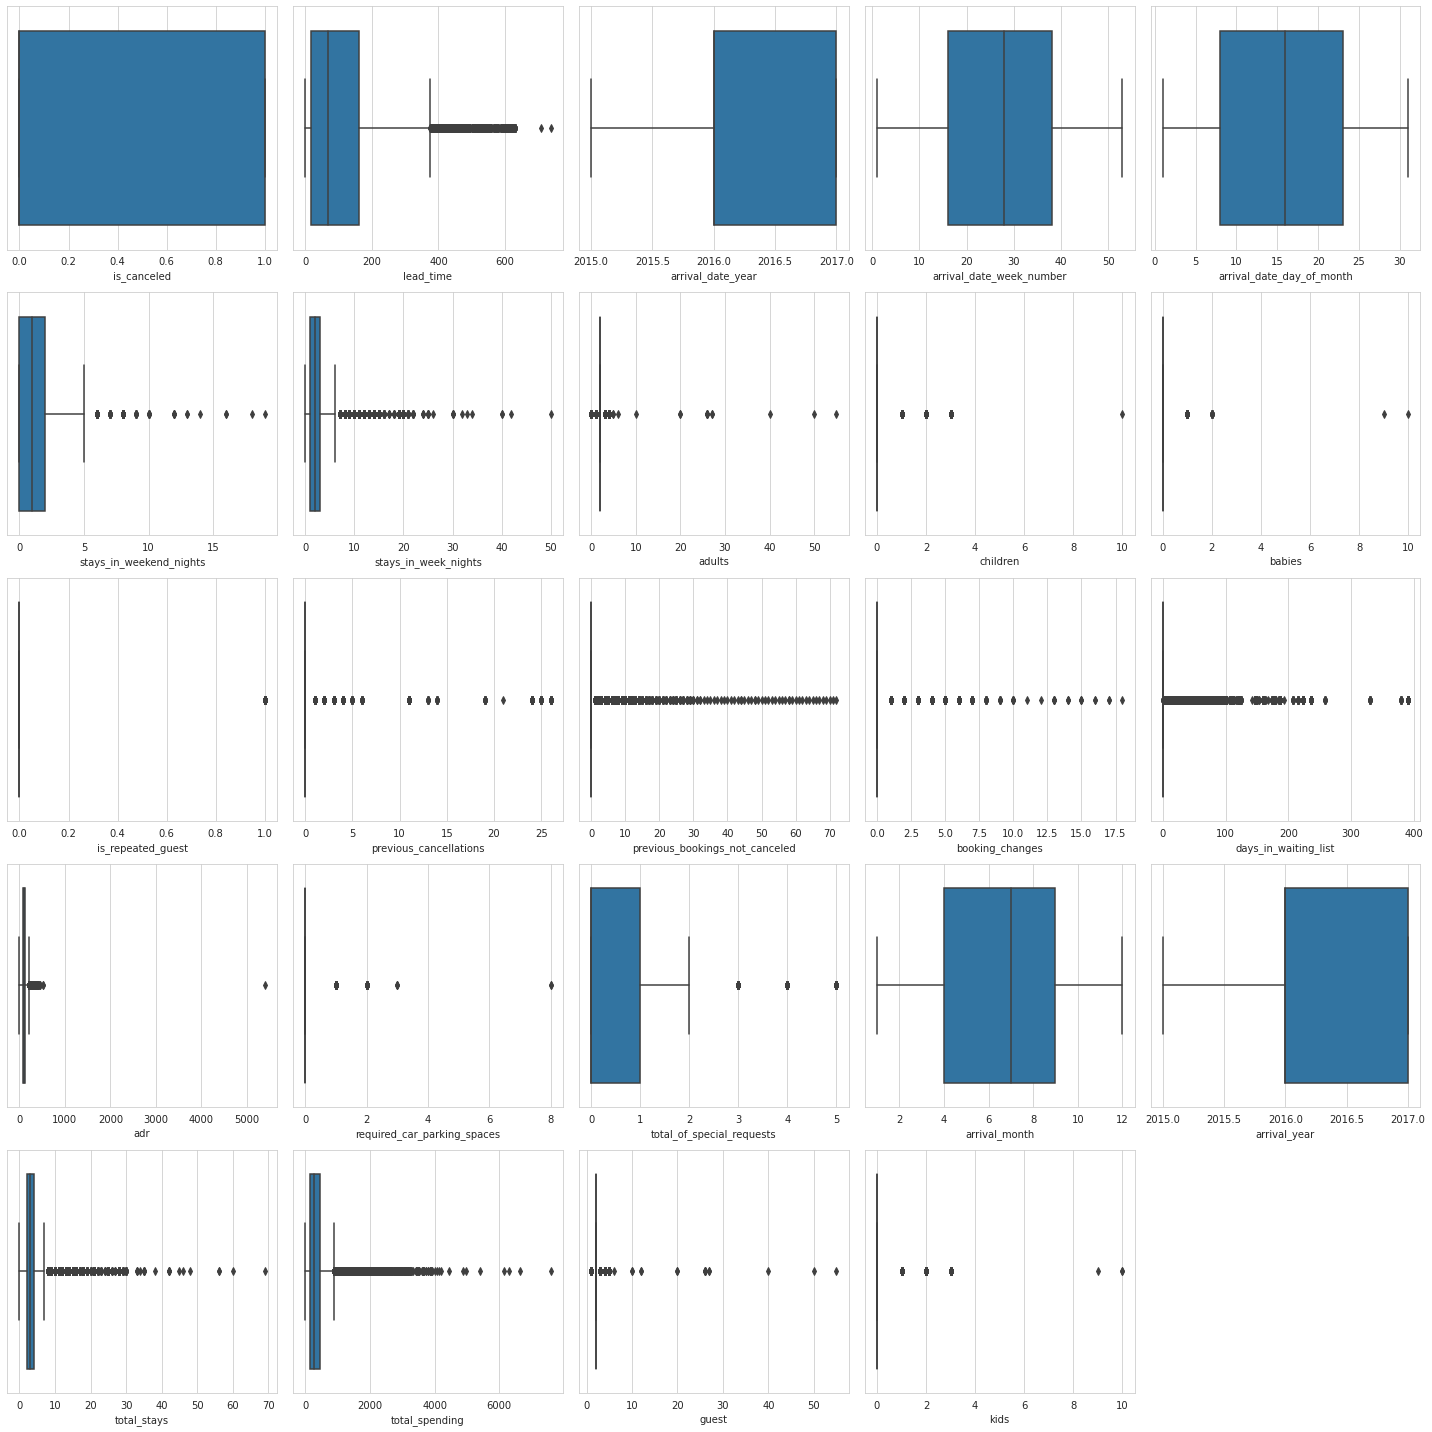

In [23]:
plt.figure(figsize = (20, 20))

x = 1

for column in hotel.describe().columns:
    plt.subplot(5, 5, x)
    sns.boxplot(hotel[column])
    x += 1
    plt.tight_layout()

# we see that most columns has their own outliers
# but columns which don't have outliers are is_canceled, arrival_date_year, arrival_date_week_number, arrival_date_day_of_month, arrival_month, arrival_year

# 6) Descriptive Analysis

In [24]:
df_canceled = hotel[hotel['is_canceled'] == 1]
df_not_canceled = hotel[hotel['is_canceled'] == 0]

# decided to divide into 2 dataset for further analysis purposes

## Univariate

In [25]:
# numerical descriptive analysis
hotel.describe().T

# we see column that has high standard deviation are:
# lead_time, adr, total_spending

,count,mean,std,min,25%,50%,75%,max
is_canceled,119209.0,0.370769,0.483013,0.0,0.0,0.00,1.00,1.0
lead_time,119209.0,104.108465,106.875574,0.0,18.0,69.00,161.00,737.0
arrival_date_year,119209.0,2016.156465,0.707484,2015.0,2016.0,2016.00,2017.00,2017.0
arrival_date_week_number,119209.0,27.163520,13.601073,1.0,16.0,28.00,38.00,53.0
arrival_date_day_of_month,119209.0,15.798807,8.781051,1.0,8.0,16.00,23.00,31.0
stays_in_weekend_nights,119209.0,0.927027,0.995081,0.0,0.0,1.00,2.00,19.0
stays_in_week_nights,119209.0,2.499165,1.897087,0.0,1.0,2.00,3.00,50.0
adults,119209.0,1.859205,0.575188,0.0,2.0,2.00,2.00,55.0
children,119209.0,0.104044,0.398837,0.0,0.0,0.00,0.00,10.0
babies,119209.0,0.007961,0.097510,0.0,0.0,0.00,0.00,10.0


In [26]:
# categorical descriptive analysis
hotel.describe(include='object').T

,count,unique,top,freq
hotel,119209,2,City Hotel,79163
arrival_date_month,119209,12,August,13861
meal,119209,4,BB,92235
country,119209,177,PRT,48961
market_segment,119209,8,Online TA,56408
distribution_channel,119209,5,TA/TO,97750
reserved_room_type,119209,9,A,85872
assigned_room_type,119209,11,A,74020
deposit_type,119209,3,No Deposit,104460
customer_type,119209,4,Transient,89476


In [27]:
# Google Colab doesn't have sidetable
!pip install sidetable
import sidetable

hotel.stb.freq(['hotel'])

# Guests tend to book City Hotel, shown as 66.4% than Resort Hotel

,hotel,count,percent,cumulative_count,cumulative_percent
0,City Hotel,79163,66.406899,79163,66.406899
1,Resort Hotel,40046,33.593101,119209,100.000000


In [28]:
hotel.stb.freq(['is_canceled'], cum_cols = False)
# Only 37% guests are canceling their book

,is_canceled,count,percent
0,0,75010,62.923101
1,1,44199,37.076899


In [29]:
hotel.stb.freq(['meal'])

# 77% guests make their booking with Bed-Breakfast (BB) package
# 12% guests choose their room with Half Board (HB) package

,meal,count,percent,cumulative_count,cumulative_percent
0,BB,92235,77.372514,92235,77.372514
1,HB,14458,12.128279,106693,89.500793
2,SC,11718,9.829795,118411,99.330587
3,FB,798,0.669413,119209,100.000000


In [30]:
hotel.stb.freq(['market_segment'])

# There are 47% guests book their hotel room through Online Travel Agent and 20% through Offline Travel Agent
# Only 10% guests book their hotel room directly to hotel
# The rest, Groups booking with 16%, Corporate 4%, and Aviation 0.2%

,market_segment,count,percent,cumulative_count,cumulative_percent
0,Online TA,56408,47.318575,56408,47.318575
1,Offline TA/TO,24182,20.285381,80590,67.603956
2,Groups,19790,16.601096,100380,84.205052
3,Direct,12582,10.554572,112962,94.759624
4,Corporate,5282,4.430874,118244,99.190497
5,Complementary,728,0.610692,118972,99.801190
6,Aviation,235,0.197133,119207,99.998322
7,Undefined,2,0.001678,119209,100.000000


In [31]:
#let see which types of hotel has a higher cancelation percentage of cancelation

round(hotel.groupby('hotel').sum() / len(hotel.index), 2)['is_canceled']

# this tells that city hotel has a higher rate of cancelation compared to resort hotel

hotel
City Hotel      0.28
Resort Hotel    0.09
Name: is_canceled, dtype: float64

## Multivariate

In [32]:
print('Most 5 Country that cancel booking')
print(df_canceled.stb.freq(['country'], cum_cols = False).head())
print('--'*20)
print('Most 5 Country that not cancel booking')
print(df_not_canceled.stb.freq(['country'], cum_cols = False).head())

# Portugal (PRT) is the nation that contributes the most hotel booking with its percentage is 28.5%
# But in other side, PRT contributes the most cancel hotel booking too with 62.3%

Most 5 Country that cancel booking
  country  count    percent
0     PRT  27563  62.361139
1     GBR   2452   5.547637
2     ESP   2177   4.925451
3     FRA   1933   4.373402
4     ITA   1333   3.015905
----------------------------------------
Most 5 Country that not cancel booking
  country  count    percent
0     PRT  21398  28.526863
1     GBR   9667  12.887615
2     FRA   8468  11.289161
3     ESP   6383   8.509532
4     DEU   6067   8.088255


In [33]:
(pd.crosstab(columns=hotel['hotel'], values=hotel['adr'], index=hotel['is_canceled'], aggfunc='sum', normalize = 'columns')*100)

# Both City Hotel and Resort Hotel, 'adr' value that not canceled is greater than the canceled hotel booking.
# There are only 41% canceled booking in the City Hotel and 31% in the Resort Hotel
# This is make sense since 63% hotel bookings are not canceled by guests

hotel,City Hotel,Resort Hotel
is_canceled,,
0,58.508134,69.068685
1,41.491866,30.931315


In [34]:
(pd.crosstab(index=hotel['market_segment'], columns=hotel['is_canceled'], values=hotel['adr'], aggfunc='sum', normalize = 'index')*100).round(2)

# On Market Segment, the most canceled hotel booking is from Group segment with 62%
# In other side, the most not canceled hotel booking is from Complementary. Since complementary is a free stuff, guests tend to take it as a gift.

is_canceled,0,1
market_segment,,
Aviation,77.54,22.46
Complementary,92.73,7.27
Corporate,78.62,21.38
Direct,83.50,16.50
Groups,37.78,62.22
Offline TA/TO,62.72,37.28
Online TA,61.47,38.53
Undefined,0.00,100.00


In [35]:
(pd.crosstab(index=hotel['reservation_status'], columns=hotel['guest'], normalize = 'columns')*100).round(2)

# There are number of guests is absolutely canceled the booking, like 6, 20, 26, 27, 40, 50 and 55 guest at once.
# The most successful booking until the check-out is 5 guests and 1 guest.

guest,1,2,3,4,5,6,10,12,20,26,27,40,50,55
reservation_status,,,,,,,,,,,,,,
Canceled,27.08,38.93,31.23,40.90,24.82,100.0,50.0,0.0,100.0,100.0,100.0,100.0,100.0,100.0
Check-Out,70.97,60.30,67.82,58.11,75.18,0.0,50.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0
No-Show,1.95,0.76,0.94,0.99,0.00,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
arrival_date_dt = hotel['arrival_date'].dt
(pd.crosstab(columns= arrival_date_dt.month, index=hotel['is_canceled'], values=hotel['adr'], aggfunc='sum', normalize = 'columns')*100).round(2)

# The most canceled book is in month 6 (June), but it just 42% only.

arrival_date,1,2,3,4,5,6,7,8,9,10,11,12
is_canceled,,,,,,,,,,,,
0,66.2,65.53,65.03,57.72,58.19,57.49,63.76,63.12,62.12,61.19,65.66,63.3
1,33.8,34.47,34.97,42.28,41.81,42.51,36.24,36.88,37.88,38.81,34.34,36.7


In [37]:
(pd.crosstab(index=hotel['hotel'], columns=hotel['reserved_room_type'], values=hotel['adr'], aggfunc='median', normalize = 'index')*100).round(2)

# We see that Room G in City Hotel has the highest daily room rate. In the Resort Hotel, Room C has the highest daily room rate.
# using median to aggregation, it's because we have contrast outliers on 'adr' column
# In the other side, Room B is the lowest daily room rate in City Hotel, but Resort Hotel has Room A.

reserved_room_type,A,B,C,D,E,F,G,H,L
hotel,,,,,,,,,
City Hotel,9.63,8.91,9.22,13.52,16.59,19.39,22.75,0.0,0.00
Resort Hotel,5.45,9.87,14.66,7.45,8.79,10.56,13.90,16.5,12.83


In [38]:
(pd.crosstab(index=hotel['hotel'], columns=hotel['reserved_room_type'], normalize = 'index')*100).round(2)

# Most Favorable room in City Hotel is Room A with 79%.
# Most favorable room in Resort Hotel is Room A with 58%.
# Room C is the lowest in City Hotel, means that guests tend to choose the pricey one or the cheaper one. Cause Room B and C is in the middle option
# Room G, in the other hand is the second lowest. It's make sense since we know that average daily rate on Room G is the highest or pricey.

reserved_room_type,A,B,C,D,E,F,G,H,L
hotel,,,,,,,,,
City Hotel,78.93,1.40,0.02,14.84,1.94,2.26,0.61,0.0,0.00
Resort Hotel,58.40,0.01,2.29,18.56,12.44,2.76,4.02,1.5,0.01


In [39]:
(pd.crosstab(index=hotel['is_canceled'], columns=hotel['meal'], normalize = 'columns')*100).round(2)

# Guest who chooses Full Board meal package is tend to cancel their booking rather than the other meals.

meal,BB,FB,HB,SC
is_canceled,,,,
0,62.59,40.1,65.53,63.88
1,37.41,59.9,34.47,36.12


In [40]:
(pd.crosstab(index = hotel['month_year'], columns = [hotel['is_canceled'],hotel['hotel']], normalize = 'index')*100).round(2)

# July 2015 seems to be the worst performing month for city hotel with highest cancellation rate with 34 % in a single month
# for resort hotel, the highest cancelation rate happened on August 2017 with a cancellation rate of 14 % in a single month

# higest number of confirmed arrival (not_cancelled booking) for city hotel is on July 2017 with 46 % of confirmed arrival from total booking of both hotel
# higest number of confirmed arrival (not_cancelled booking) for resort hotel is on November 2015 with 39 % of confirmed arrival from total booking of both hotel

# for majority of the month-year city hotel have a higher confirmed arrival compared to resort hotel, with an exeption of July 2015 resort hotel has higher confirmed arrival

is_canceled          0                       1             
hotel       City Hotel Resort Hotel City Hotel Resort Hotel
month_year                                                 
2015-07          16.47        38.14      33.85        11.54
2015-08          31.99        26.86      31.73         9.43
2015-09          38.79        20.24      30.18        10.78
2015-10          41.63        23.39      26.68         8.30
2015-11          39.88        39.32      12.88         7.92
2015-12          33.68        32.92      22.93        10.47
2016-01          41.19        34.03      19.48         5.29
2016-02          36.97        28.66      23.92        10.45
2016-03          40.11        29.24      22.99         7.66
2016-04          37.24        24.79      28.35         9.62
2016-05          40.86        24.16      26.23         8.75
2016-06          41.61        18.77      32.51         7.11
2016-07          45.64        21.60      22.76        10.00
2016-08          42.00        21.90      24.67        11.43
2016-09          42.68        19.81      29.07         8.44
2016-10          36.56        22.87      31.42         9.15
2016-11          39.33        23.82      30.65         6.20
2016-12          36.30        27.43      27.80         8.48
2017-01          36.02        29.98      28.40         5.61
2017-02          38.75        28.67      23.27         9.31
2017-03          42.76        23.46      25.81         7.96
2017-04          35.20        21.32      33.98         9.50
2017-05          36.97        19.22      35.16         8.64
2017-06          38.25        18.51      32.04        11.19
2017-07          42.03        20.60      24.93        12.43
2017-08          40.67        22.49      22.77        14.08

In [41]:
(pd.crosstab(index = hotel['total_stays'], columns = [hotel['hotel'], hotel['is_canceled']],normalize = 'index')*100).round(2)

# For City hotel traveler who book for 20 days has the highest chances to cancel a booking compared to other group in city hotels 
# For Resort hotel traveler who book for 18 days has the highest cancelation rate compared to other group

hotel       City Hotel        Resort Hotel       
is_canceled          0      1            0      1
total_stays                                      
0                38.91   2.02        57.52   1.55
1                43.58  19.53        31.32   5.56
2                39.75  37.75        16.24   6.26
3                43.93  35.04        14.14   6.89
4                44.29  27.93        19.12   8.66
5                41.31  22.84        24.44  11.41
6                28.89  24.39        31.33  15.39
7                14.40   9.34        51.27  24.99
8                17.75  15.24        44.07  22.94
9                14.17  11.07        48.57  26.19
10                7.05  10.23        61.55  21.16
11                8.40  11.70        61.07  18.83
12               15.00  13.64        40.45  30.91
13               10.64  18.44        53.19  17.73
14                2.85   7.78        69.00  20.37
15               19.44  34.72        31.94  13.89
16               15.00  25.00        30.00  30.00
17               20.00  20.00        55.00   5.00
18                2.86  17.14        14.29  65.71
19                9.09  45.45        18.18  27.27
20                7.14  85.71         0.00   7.14
21                1.41  12.68        49.30  36.62
22               15.38  30.77        53.85   0.00
23               12.50  12.50        12.50  62.50
24               16.67  83.33         0.00   0.00
25                0.00   5.41        37.84  56.76
26                0.00  50.00         0.00  50.00
27                0.00  75.00         0.00  25.00
28                0.00   8.82        64.71  26.47
29                0.00  76.92        15.38   7.69
30                0.00  61.54        15.38  23.08
33                0.00  66.67         0.00  33.33
34              100.00   0.00         0.00   0.00
35                0.00   0.00       100.00   0.00
38                0.00   0.00       100.00   0.00
42                0.00   0.00        75.00  25.00
45                0.00   0.00       100.00   0.00
46                0.00   0.00       100.00   0.00
48              100.00   0.00         0.00   0.00
56                0.00   0.00        50.00  50.00
60                0.00   0.00       100.00   0.00
69                0.00   0.00       100.00   0.00

In [42]:
(pd.crosstab(index = hotel['meal'], columns = [hotel['is_canceled'], hotel['hotel']], normalize = 'columns')*100).round(2)

# conclusion from this table most traveler who came to city or resort hotel mostly prefer bed and breakfast meal package
# bed and breakfast has the highest cancellation rate for both hotel
# for city hotel no meal package (SC) has the second highest cancellation rate after BB
# for resort hotel Half board (HB) package  has the second highest cancellation rate

# for city hotel, the lowest cancellation rate is FB meal package
# for the resort hotel, the lowest cancellation rate is no meal package(SC)

is_canceled          0                       1             
hotel       City Hotel Resort Hotel City Hotel Resort Hotel
meal                                                       
BB               77.19        76.61      80.60        70.53
FB                0.02         1.08       0.11         3.98
HB                8.63        19.01       7.36        22.90
SC               14.17         3.31      11.93         2.58

In [43]:
(pd.crosstab(index = hotel['arrival_day'], columns = [hotel['hotel'], hotel[hotel['is_canceled']==1]['is_canceled']], normalize = 'columns')*100).round(2)

# For Resort hotel booking with arrival day of Saturday seem to have the highest cancellation rate
# while for city hotel booking with with arrival day of Thursday and Friday have the highest cancellation rate

hotel,City Hotel,Resort Hotel
is_canceled,1,1
arrival_day,,
Friday,18.59,16.40
Monday,13.80,14.61
Saturday,14.50,20.96
Sunday,9.54,12.64
Thursday,19.07,14.54
Tuesday,10.44,10.28
Wednesday,14.06,10.56


In [44]:
((hotel.groupby('lead_time')['is_canceled'].sum().sort_values(ascending = False).head(20)) / len(df_canceled.index)*100).to_frame()

# 1% of total cancellation come from guests who booked the hotel on the same day as the arrival
# other than 0 and 1 day lead time cancellation seems to be on the higher side if lead time is more than 2

,is_canceled
lead_time,
0,0.943460
56,0.800923
28,0.766986
34,0.746623
37,0.721736
1,0.719473
38,0.631236
12,0.628974
68,0.595036


In [45]:
(pd.crosstab(columns = hotel['is_canceled'], index = hotel['deposit_type'], normalize = 'columns')*100).round(3)

# most of the booking (confirmed or canceled) has no deposit
# non refundable has the lowest number confirmed booking (not cancelled) with only 0.1 % of confirmed arrival
# however 33 % of canceled booking comes from guest who booked with non refund policy
# Refundable deposit type has the lowest percentage of cancellation compared to other deposit type

is_canceled,0,1
deposit_type,,
No Deposit,99.708,67.126
Non Refund,0.124,32.793
Refundable,0.168,0.081


In [46]:
print(pd.crosstab(columns = [hotel['hotel'],hotel['is_canceled']], index = hotel['deposit_type']))
print("")

print("-" * 50)

print("")
print(pd.crosstab(columns = [hotel['hotel'],hotel['is_canceled']], index = hotel['deposit_type'],normalize = 'columns').round(4))

#General Analysis :
    # Both hotel has the highest confirmed booking and cancelled booking from no deposit policy
    # Of all deposit type policy, non refund seems to have the highest cancellation rate compared to it's confirmed arrival
    # very low percentage of confirmed booking and canceled booking in refundable deposit policy

# Suggestion :
    # Both Hotel should try to push more on the refundable deposit policy since in both hotel it has the lowest of cancellation rate
    # cheaper rate for refundable program

hotel        City Hotel        Resort Hotel      
is_canceled           0      1            0     1
deposit_type                                     
No Deposit        46054  20221        28737  9448
Non Refund           24  12844           69  1650
Refundable            6     14          120    22

--------------------------------------------------

hotel        City Hotel         Resort Hotel        
is_canceled           0       1            0       1
deposit_type                                        
No Deposit       0.9993  0.6113       0.9935  0.8496
Non Refund       0.0005  0.3883       0.0024  0.1484
Refundable       0.0001  0.0004       0.0041  0.0020


In [47]:
print(pd.crosstab(index = hotel['market_segment'], columns = hotel['is_canceled']))

print("")

print('-' * 50)

print("")

print(pd.crosstab(index = hotel['market_segment'], columns = hotel['is_canceled'], normalize = 'index'))

# Analysis :
    # Of all distribution channel  group booking is the only market segment that has a higher cancellation rate compared to it's  confirmed booking
    # Complementary has the lowest of cancellation rate compared to other market segment
    # next to complementary direct booking seems to be the 2nd lowest cancellation rate among all market segment
    



is_canceled         0      1
market_segment              
Aviation          183     52
Complementary     639     89
Corporate        4291    991
Direct          10648   1934
Groups           7696  12094
Offline TA/TO   15880   8302
Online TA       35673  20735
Undefined           0      2

--------------------------------------------------

is_canceled            0         1
market_segment                    
Aviation        0.778723  0.221277
Complementary   0.877747  0.122253
Corporate       0.812382  0.187618
Direct          0.846288  0.153712
Groups          0.388883  0.611117
Offline TA/TO   0.656687  0.343313
Online TA       0.632410  0.367590
Undefined       0.000000  1.000000


In [48]:
print(pd.crosstab(index = hotel['market_segment'], columns = [hotel['deposit_type'],hotel['is_canceled']], margins = True))
print("")
print('-' * 90)
print(pd.crosstab(index = hotel['market_segment'], columns = [hotel['deposit_type'],hotel['is_canceled']], normalize = 'index'))

# Analysis :
    # Among all market segmentation, group with non refund policy has the highest rate of cancellation

deposit_type   No Deposit        Non Refund        Refundable         All
is_canceled             0      1          0      1          0   1        
market_segment                                                           
Aviation              183     52          0      0          0   0     235
Complementary         639     89          0      0          0   0     728
Corporate            4266    678         22    312          3   1    5282
Direct              10641   1916          3     16          4   2   12582
Groups               7517   2971         62   9110        117  13   19790
Offline TA/TO       15875   3297          3   5003          2   2   24182
Online TA           35670  20664          3     53          0  18   56408
Undefined               0      2          0      0          0   0       2
All                 74791  29669         93  14494        126  36  119209

------------------------------------------------------------------------------------------
deposit_type   No De

In [49]:
pd.crosstab(index = hotel['market_segment'], columns = [ hotel['deposit_type'],hotel['is_canceled']], values = hotel['adr'], aggfunc = 'median')

# For No deposit booking corporate booking have the lowest median adr for confirmed traveler
# for canceled  no deposit booking group booking has the lowest adr

# group booking has the lowest adr median for non refund canceled or confirmed booking
# group booking also has the lowest median adr for refundable canceled or confirmed booking

deposit_type   No Deposit         Non Refund        Refundable        
is_canceled             0       1          0      1          0       1
market_segment                                                        
Aviation            95.00  106.75        NaN    NaN        NaN     NaN
Complementary        0.00    0.00        NaN    NaN        NaN     NaN
Corporate           65.00   72.00     106.00   90.0       85.5   79.00
Direct             104.00  114.00      89.00  100.0       70.0  127.50
Groups              72.00   63.40      54.50   75.0       66.0   46.00
Offline TA/TO       80.75   85.00      72.25   95.0       74.0   78.23
Online TA          107.10  116.10     173.95   85.5        NaN  139.50
Undefined             NaN   15.00        NaN    NaN        NaN     NaN

In [50]:
pd.crosstab(index = hotel['market_segment'], columns = [ hotel['deposit_type'],hotel['is_canceled']], values = hotel['total_spending'], aggfunc = 'median')

# For non cancelled booking Online Travel agent has the highest median total spending for No deposit and No Refund Policy
# Corporate has the lowest total spending for no deposit policy (complementary excluded)
# Non cancelled Direct Booking has the lowest median total spending for refundable, and no refund policy 
#


deposit_type   No Deposit        Non Refund        Refundable         
is_canceled             0      1          0      1          0        1
market_segment                                                        
Aviation            285.0  190.0        NaN    NaN        NaN      NaN
Complementary         0.0    0.0        NaN    NaN        NaN      NaN
Corporate            88.0  100.0     318.00  200.0       85.5  474.000
Direct              237.6  340.0      89.00  300.0       70.0  659.250
Groups              196.0  188.4     109.00  180.0      240.0  184.000
Offline TA/TO       260.0  251.2     361.25  255.0      179.5  714.070
Online TA           315.9  381.6     335.32  167.0        NaN  473.005
Undefined             NaN   24.0        NaN    NaN        NaN      NaN

In [51]:
pd.crosstab(index = hotel['arrival_month'], columns = [hotel['hotel'], hotel['is_canceled']], values = hotel['total_spending'], aggfunc = 'median')

# From the month of may to september resort hotel has a higher median spending compared to city hotel
# August seem to be the highest median spending for both hotel

hotel         City Hotel        Resort Hotel        
is_canceled            0      1            0       1
arrival_month                                       
1                 195.00  176.0       86.000  144.00
2                 225.00  190.0      116.000  144.00
3                 244.50  261.9      153.000  224.07
4                 320.00  300.0      236.275  330.00
5                 323.00  300.0      258.000  324.00
6                 283.70  315.0      468.000  516.00
7                 280.00  270.0      671.020  840.00
8                 306.00  258.0      828.800  955.00
9                 250.20  240.0      404.440  317.00
10                257.01  226.8      184.000  243.00
11                216.75  267.0      120.000  129.60
12                232.00  260.0      132.000  204.00

# 7) Data Visualization

## Univariate

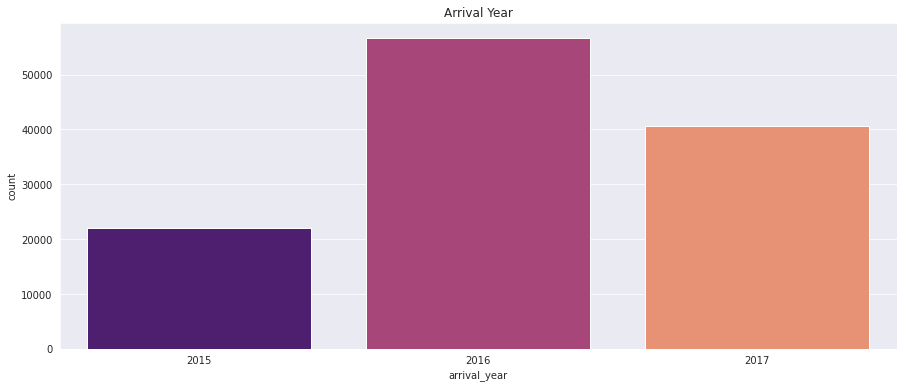

In [141]:
plt.figure(figsize=(15,6))
sns.countplot(x="arrival_year", data = hotel, palette='magma')
plt.title('Arrival Year')
plt.show()

# See that 2016 dominates the other years. It's because they are don't represent the entire year since both 2015 and 2017 start either at the Q2 or end at the Q2.

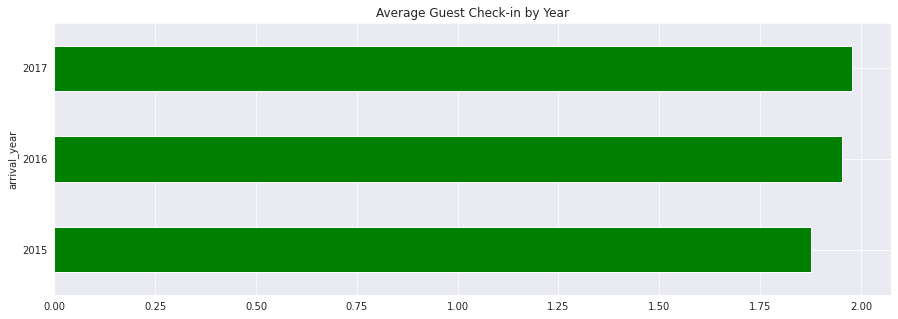

In [139]:
plt.figure(figsize=(15,5))
hotel_nc.groupby('arrival_year').mean()['guest'].plot(kind = 'barh', x = 'Arrival Year', color = 'green')
plt.title("Average Guest Check-in by Year")
plt.show()

# We see that by averaging the guest checks-in, 2017 is still the most check-in compares to others.

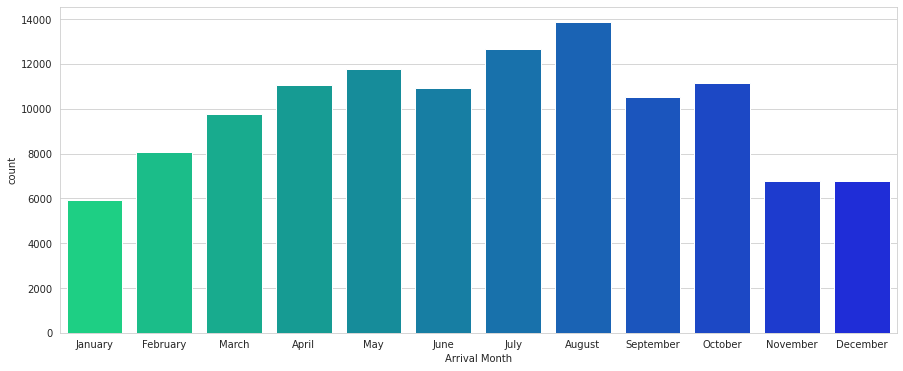

In [53]:
plt.figure(figsize=(15,6))
order = ['January','February','March','April', "May", 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sns.countplot(x=arrival_date_dt.month_name(), order=order, palette='winter_r')
plt.xlabel('Arrival Month')
plt.show()

# most guests come on August

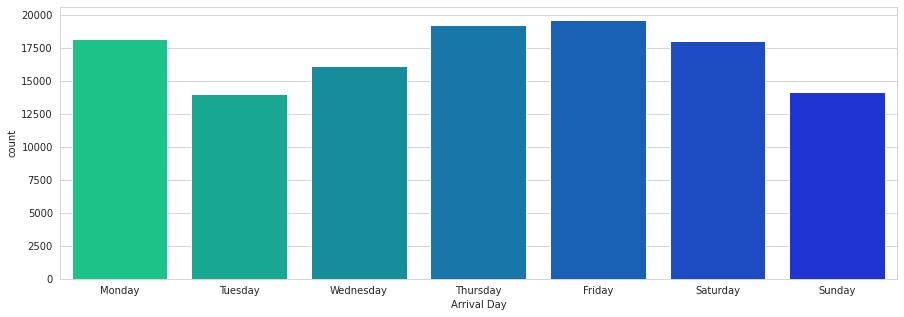

In [54]:
plt.figure(figsize=(15,5))
order=['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday','Saturday','Sunday']
sns.countplot(x=arrival_date_dt.day_name(), palette='winter_r', order=order)
plt.xlabel('Arrival Day')
plt.show()

# Most guest come on Monday, Thursday, and Friday to check-in

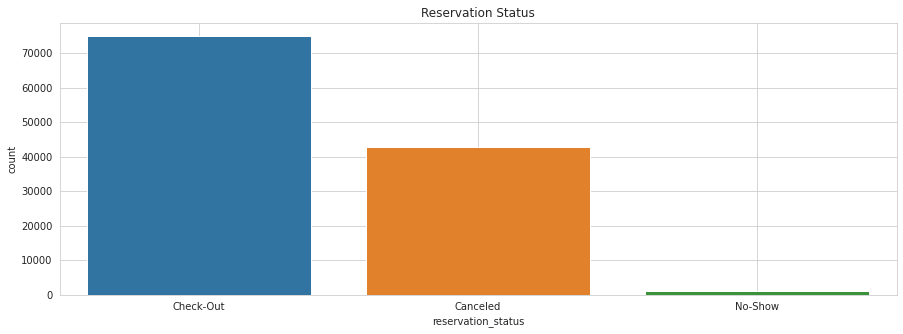

In [55]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'reservation_status', data = hotel)
plt.title("Reservation Status")
plt.grid(True)
plt.show()

# we see that most guest completes their booking until check-out phase

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


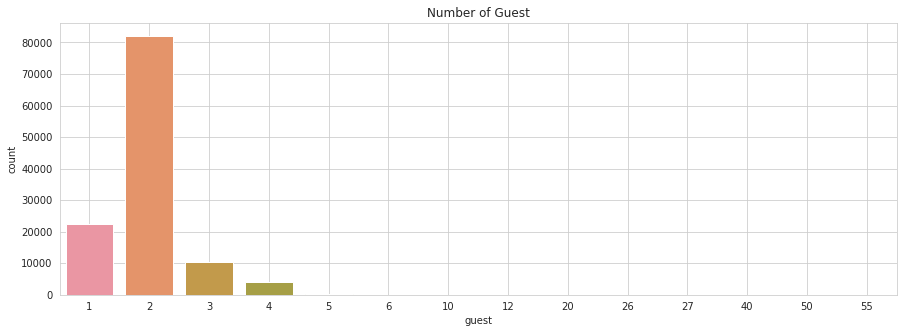

In [56]:
plt.figure(figsize=(15,5))
sns.countplot(hotel['guest'])
plt.title("Number of Guest")
plt.grid(True)
plt.show()

# Most guest book their hotels' room with 1 person

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


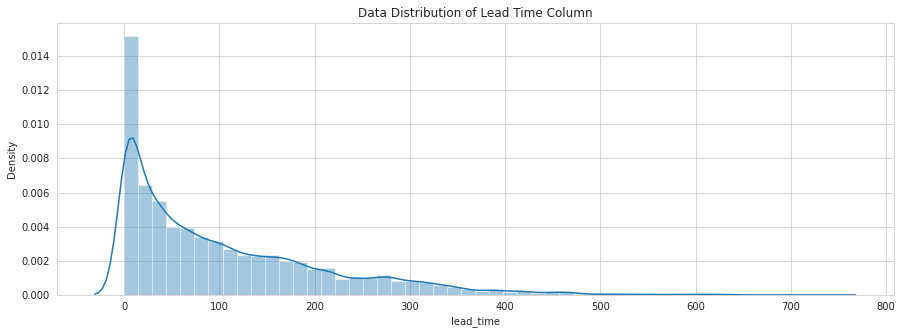

In [57]:
plt.figure(figsize=(15,5))
sns.distplot(hotel['lead_time'])
plt.title("Data Distribution of Lead Time Column")
plt.grid(True)
plt.show()


# We see that the data distribution of lead time column looks right-skewed distribution
# Where the most frequent value is about 0 until 20 days.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


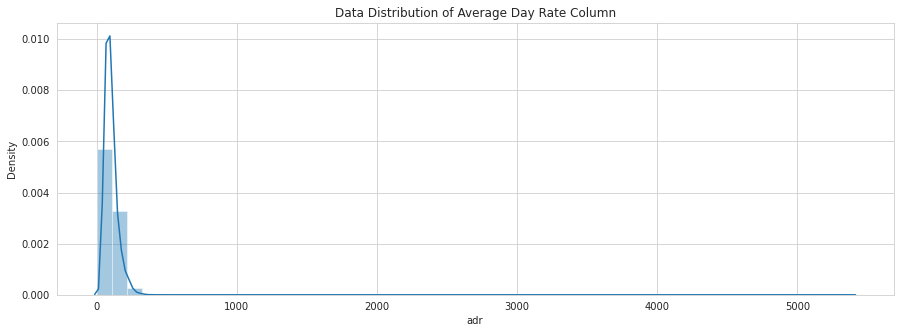

In [58]:
plt.figure(figsize=(15,5))
sns.distplot(hotel['adr'])
plt.title("Data Distribution of Average Day Rate Column")
plt.grid(True)
plt.show()

# we see that data distribution of 'adr' columnn has right-skewed distribution and likely in range 500 below

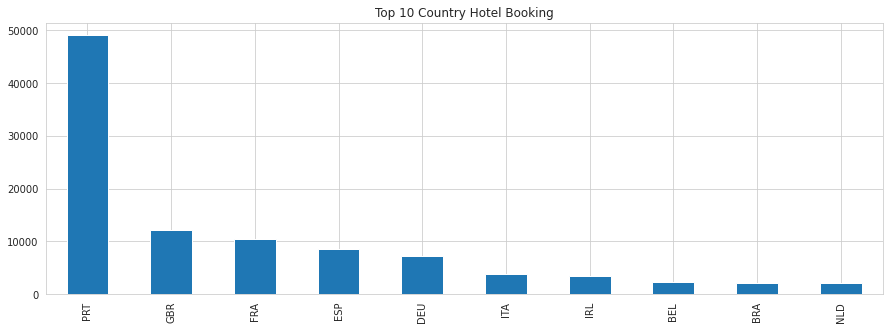

In [59]:
plt.figure(figsize=(15,5))
hotel['country'].value_counts().head(10).plot(kind = 'bar')
plt.title("Top 10 Country Hotel Booking")
plt.grid(True)
plt.show()

# Portugal (PRT) is the most country that guest come from
# It seems normal since this dataset was published in Portugal

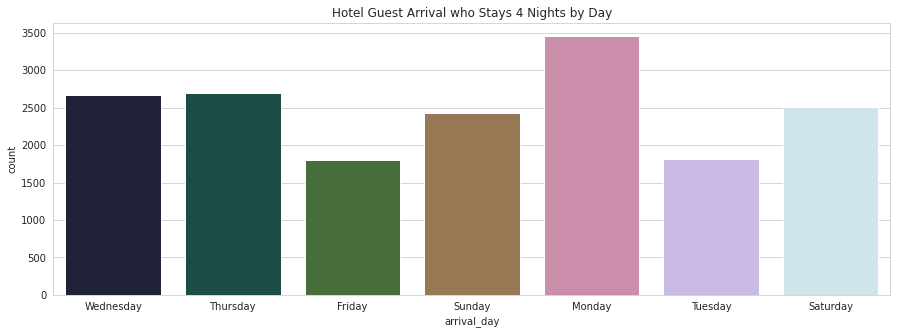

In [60]:
# let's take a look on guest who stays 4 nights
plt.figure(figsize = (15,5))
sns.countplot(data = hotel[hotel['total_stays'] == 4], x = 'arrival_day',palette = 'cubehelix')
plt.title("Hotel Guest Arrival who Stays 4 Nights by Day")
plt.show()

# Most guest who checks-in for 4 nights start their night on Monday
# If guests start their stay on Monday for 4 nights, then they're going to check out on Friday

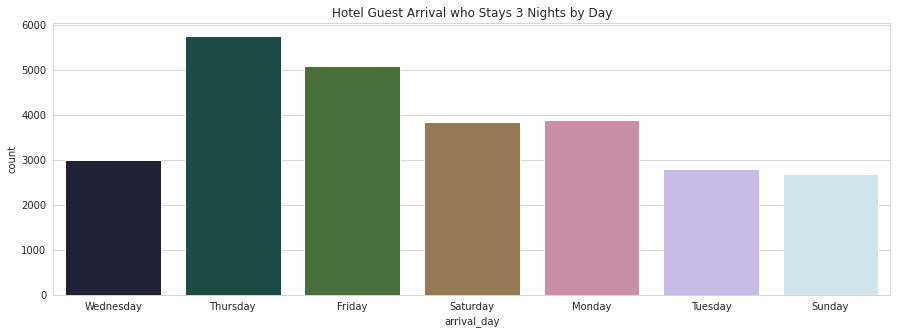

In [61]:
# let's take a look on guest who stays 3 nights
plt.figure(figsize = (15,5))
sns.countplot(data = hotel[hotel['total_stays'] == 3], x = 'arrival_day',palette = 'cubehelix')
plt.title("Hotel Guest Arrival who Stays 3 Nights by Day")
plt.show()

# Most guest who checks-in for 3 days nights their night on Thursday
# If guests start their stay on Thursday for 3 nights, then they're going to check out on Sunday

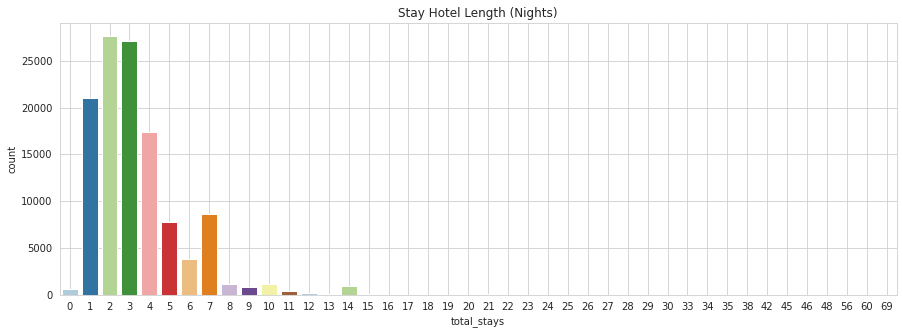

In [62]:
plt.figure(figsize = (15,5))
sns.countplot(data = hotel, x = 'total_stays', palette = 'Paired')
plt.title("Stay Hotel Length (Nights)")
plt.grid(True)
plt.show()

# Most guests stay for 2 nights, 3 nights, 1 night, 4 nights, and 7 nights

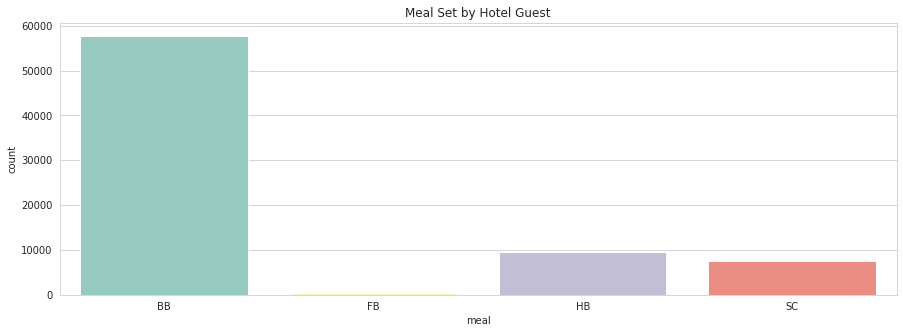

In [63]:
plt.figure(figsize = (15,5))
sns.countplot(data = df_not_canceled, x = 'meal', palette = 'Set3')
plt.title("Meal Set by Hotel Guest")
plt.show()

# BB is Bed & Breakfast
# HB is Half Board -- Breakfast + one meal (usually dinner)
# SC is no meal package
# FB is Full Board -- Breakfast, Lunch, Dinner

# we see that 'BB' is the most choice by guest. In the other hand, 'HB' and 'SC' were choosen by guests.

## Multivariate

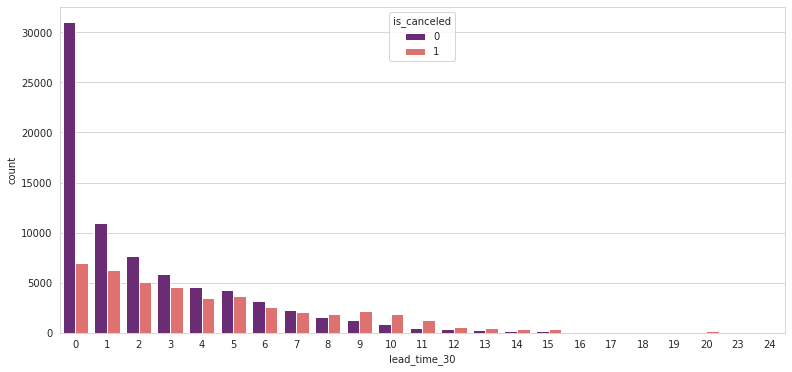

In [64]:
hotel['lead_time_30'] = hotel['lead_time']//30  # convert to month

plt.figure(figsize=(13,6))
sns.countplot(x=hotel['lead_time_30'], hue=hotel['is_canceled'], palette='magma')

plt.show()


# Guests tend to cancel their booking after 7 months or 210 days lead time

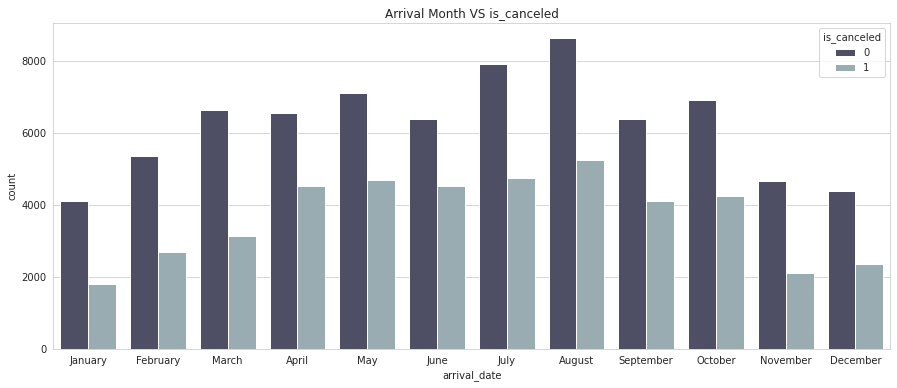

In [65]:
order = ['January','February','March','April', "May", 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.figure(figsize=(15,6))
sns.countplot(x=arrival_date_dt.month_name(), palette='bone',hue=hotel['is_canceled'], order=order)
plt.title('Arrival Month VS is_canceled')
plt.show()

# Most cancelation happend on August

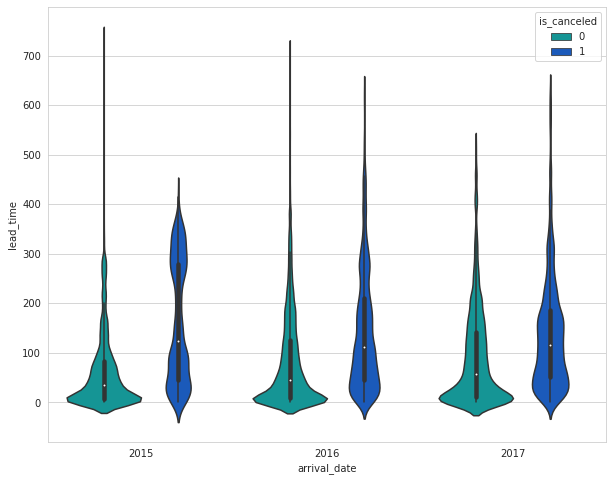

In [66]:
plt.figure(figsize=(10,8))
sns.violinplot(x=arrival_date_dt.year, y='lead_time', data=hotel, palette='winter_r', hue='is_canceled')
plt.show()

# From 2015 until 2017, guests who don't cancel their booking have 'lead time' range from 0-300 days.
# Besides that, for guest who cancel their booking have wider 'lead time' range from 0 - 425 days.
# The longer the lead time, then guests tend to cancel their book

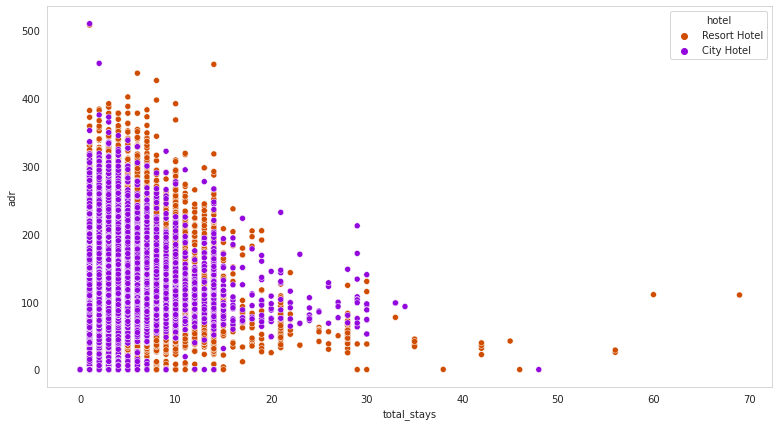

In [67]:
plt.figure(figsize=(13,7))
sns.scatterplot(x='total_stays', y='adr', data=hotel[hotel['adr'] < 1000], hue='hotel', palette='gnuplot_r')
plt.grid()

# we see that Resort Hotel has longer range total stays than City Hotel
# The smaller total stays value, the bigger'adr' value is.
# Meanwhile the higher total stays value, the smaller 'adr' value.

<Figure size 936x504 with 0 Axes>

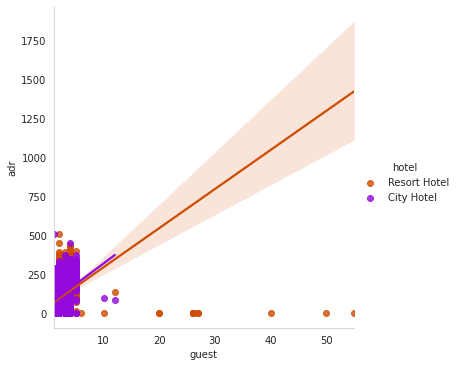

In [68]:
plt.figure(figsize=(13,7))
sns.lmplot(x='guest', y='adr', data=hotel[hotel['adr'] < 1000], hue='hotel', palette='gnuplot_r')
plt.grid()

# 'adr' and 'guest' have a positive relationship
# the more guests, the higher 'adr' value

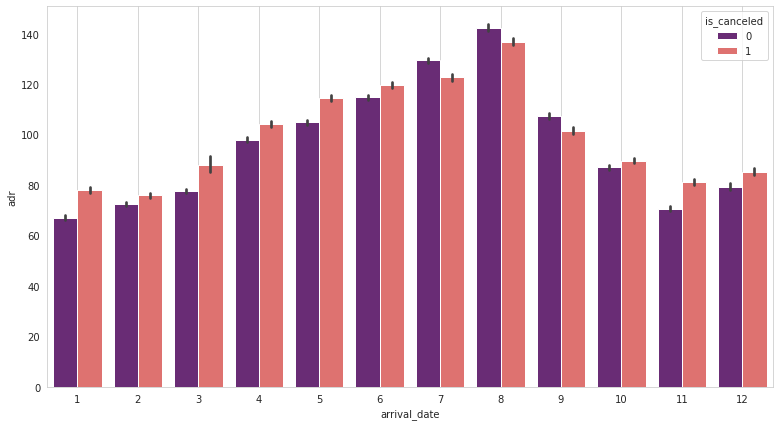

In [69]:
plt.figure(figsize=(13,7))
sns.barplot(x=arrival_date_dt.month,y='adr', data=hotel, hue='is_canceled', palette='magma')
plt.grid()

# we see that except July, August, September; average daily rate in canceled booking is more higher than not canceled

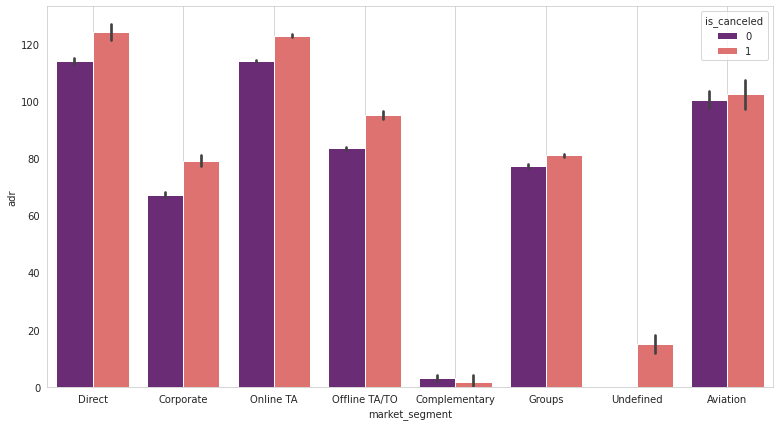

In [70]:
plt.figure(figsize=(13,7))
sns.barplot(x='market_segment',y='adr', data=hotel, hue='is_canceled', palette='magma')
plt.grid()

# cancelation with 'adr' in every market segmen is always higher than not canceled
# except Complementary segment

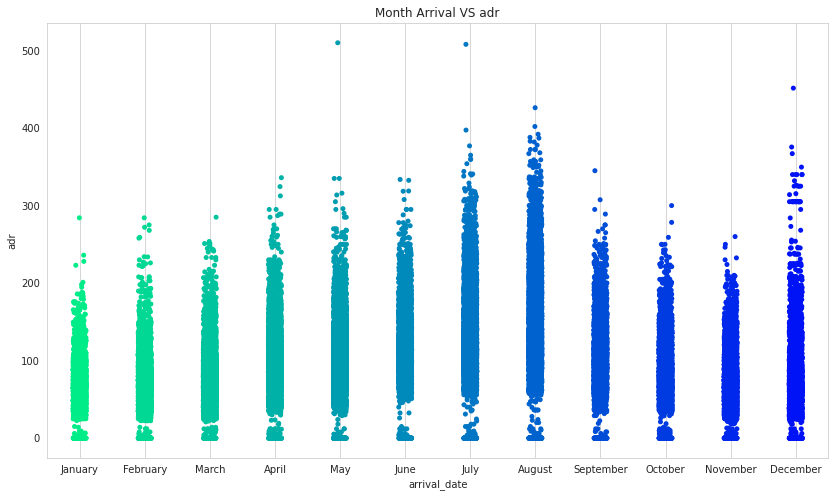

In [71]:
plt.figure(figsize=(14,8))
order = ['January','February','March','April', "May", 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sns.stripplot(x=arrival_date_dt.month_name(), y='adr', data=df_not_canceled, palette='winter_r',order=order,dodge=True)
plt.grid()
plt.title('Month Arrival VS adr')
plt.show()

# we see that actual data is spreading thickly from about 50 until 150 on 'adr' value.
# means that most guests spend their money between that range

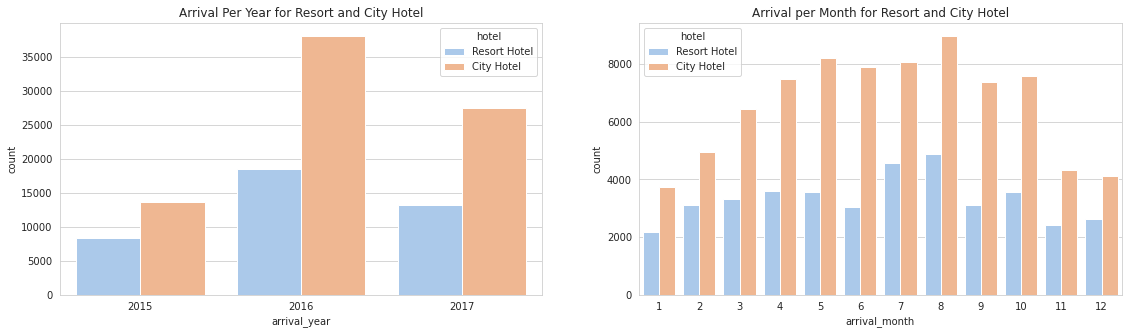

In [72]:
plt.figure(figsize = (10, 5))
plt.subplot(1,2,1)
sns.countplot(x = 'arrival_year', hue = 'hotel', data = hotel, palette = 'pastel')
plt.title("Arrival Per Year for Resort and City Hotel")
plt.subplot(1,2,2)
sns.countplot(x = 'arrival_month', hue = 'hotel', data = hotel, palette = 'pastel')
plt.title("Arrival per Month for Resort and City Hotel")
plt.subplots_adjust(right = 1.6)

plt.show()


# Both hotel has their highest booking in 2016 
# City Hotel has more booking compared to resort hotel
# for month to month analysis, August seems to be the busiest month for both hotels, and january seems to be least busy month for both hotels

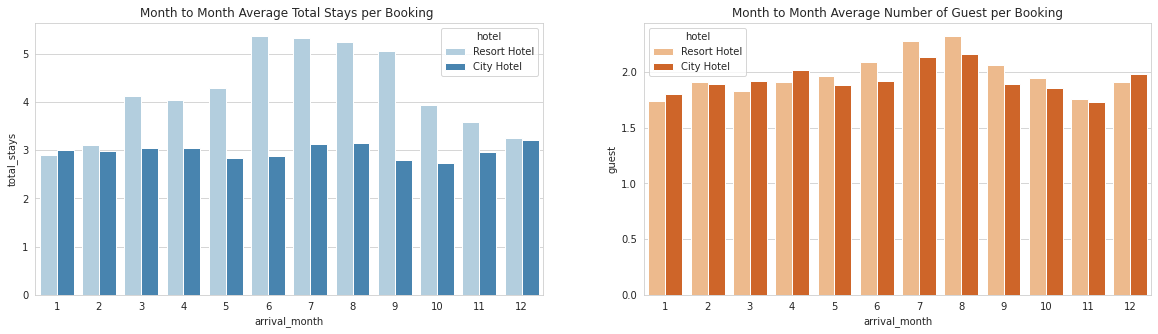

In [73]:
plt.figure(figsize = (20, 5))
plt.subplot(1,2,1)
sns.barplot(x = 'arrival_month', y= 'total_stays',hue = 'hotel', palette = 'Blues', data = hotel, ci = 0)
plt.title('Month to Month Average Total Stays per Booking ')
plt.subplot(1,2,2)
sns.barplot(x = 'arrival_month', y= 'guest',hue = 'hotel', palette = 'Oranges', data = hotel, ci = 0)
plt.title('Month to Month Average Number of Guest per Booking')
plt.show()

# For month to month analysis traveler who booked resort hotel tend to stay longer compared to traveler who booked city hotel
# For Majority of the year both hotel has almost similar number of guest of each booking 
# For City Hotel traveler stays for 3 days in average for the majority of the year

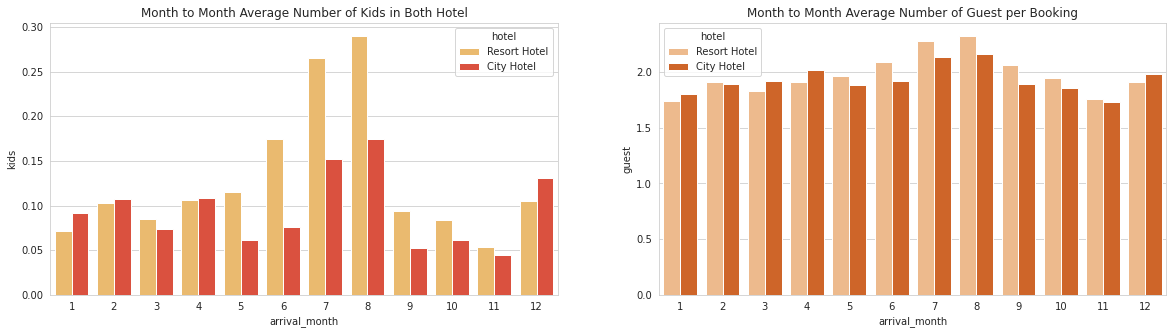

In [74]:
plt.figure(figsize = (20, 5))

plt.subplot(1,2,1)
sns.barplot(x = 'arrival_month', y= 'kids',hue = 'hotel', palette = 'YlOrRd', data = hotel, ci = 0)
plt.title('Month to Month Average Number of Kids in Both Hotel')
plt.subplot(1,2,2)
sns.barplot(x = 'arrival_month', y= 'guest',hue = 'hotel', palette = 'Oranges', data = hotel, ci = 0)
plt.title('Month to Month Average Number of Guest per Booking')

plt.show()


# Number of kids arrived in resort hotel gradually increasing starting from march to august
    # this might due to school holidat ('Assumption')

    
# There is a sudden increase in the number of Kids arrival in December for both hotel
    
## Consult this with the team 

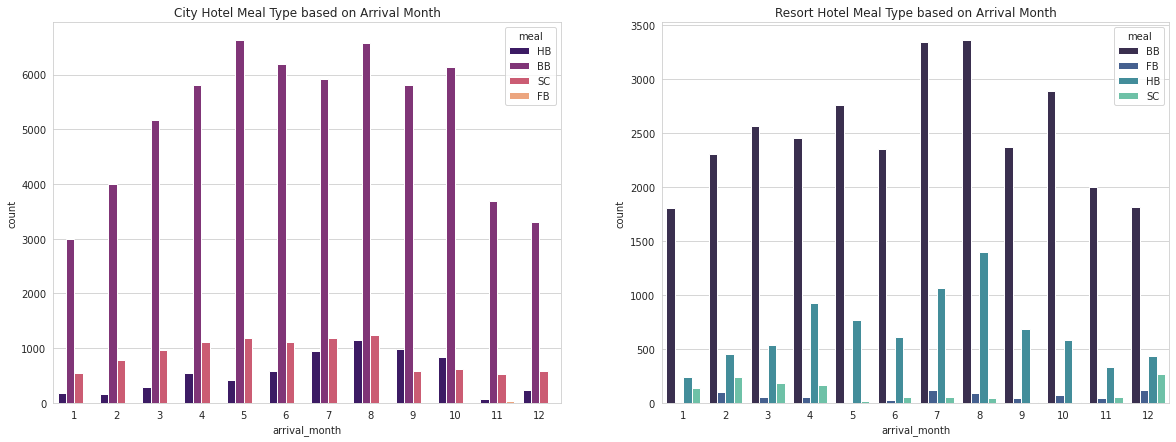

In [75]:
plt.figure(figsize = (20, 7))
plt.subplot(1,2,1)
sns.countplot(x = 'arrival_month', hue = 'meal', data = hotel[hotel['hotel'] == 'City Hotel'], palette = 'magma')
plt.title('City Hotel Meal Type based on Arrival Month')
plt.subplot(1,2,2)
sns.countplot(x = 'arrival_month', hue = 'meal', data = hotel[hotel['hotel'] == 'Resort Hotel'], palette = 'mako')
plt.title('Resort Hotel Meal Type based on Arrival Month')
plt.show()
# Bed and Breakfast seems to be the most popular meal package for both hotel with the highest demand on 
    # May for City Hotel and August For Resort Hotel
    
# No meal package or SC is second most popular package for city hotel for majority of the year
# For Resort Hotel Half Board Meal Package is the second most popular meal package

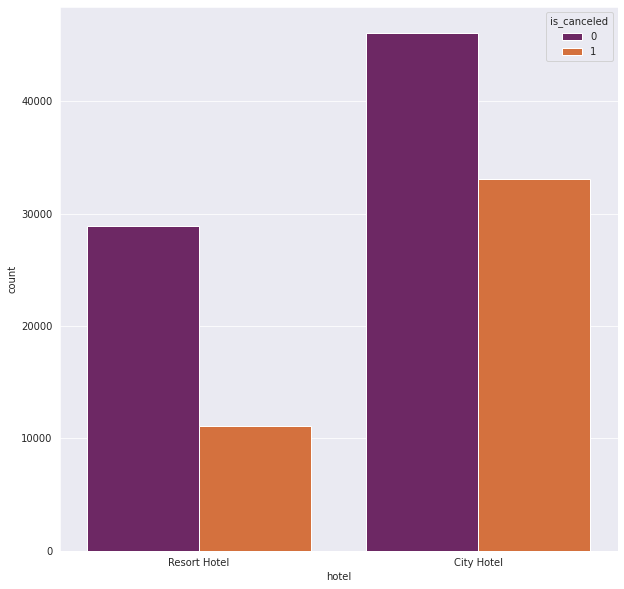

In [122]:
plt.figure(figsize = (10,10))
sns.countplot(x= 'hotel', hue = 'is_canceled', data = hotel, palette = 'inferno')
plt.show()

# This Shows that city hotel is more people preffered city hotel compared to resort hotel
# resort hotel has a lower cancellation rate compared to city hotel

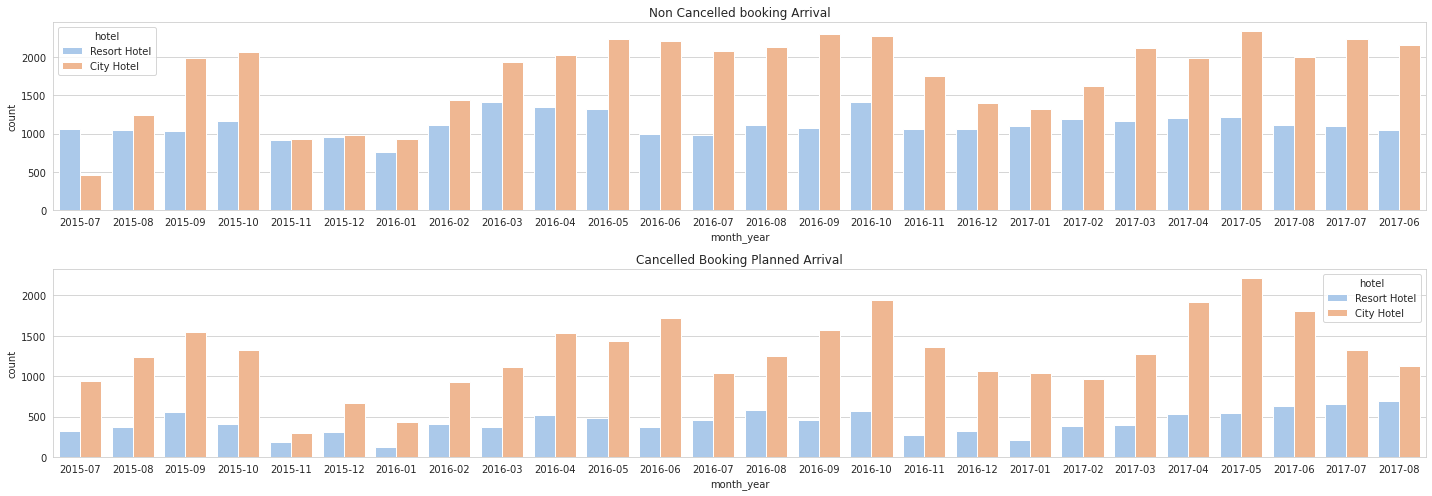

In [77]:
plt.figure(figsize = (20, 7))
plt.subplot(2,1,1)
sns.countplot(data = df_not_canceled, x = 'month_year', hue = 'hotel', palette = 'pastel')
plt.title('Non Cancelled booking Arrival')
plt.subplot(2,1,2)
sns.countplot(data = df_canceled, x = 'month_year', hue = 'hotel', palette = 'pastel')
plt.title('Cancelled Booking Planned Arrival')
plt.tight_layout()
plt.show()

# the highest cancellation rate for city hotel happened on may 2017
# while for resort hotel the highest cancellation rate happened on August 2017

# For no Cancelled Booking City hotel has the highest confirmed booking on september 2016 and may 2017
# For Resort Hotel highest confirmed arrival on march 2016 and october 2016

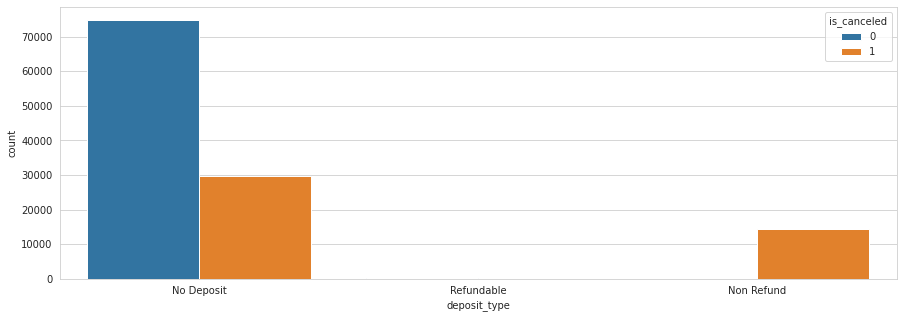

In [78]:
## Cancellation and deposit
plt.figure(figsize = (15, 5))
sns.countplot(data = hotel, x = 'deposit_type', hue = 'is_canceled')

# from this graph we could conclude no deposit policy might lead into a higher cancellation rate
# we are not gonna focus too much on the no refund policy since it wouldn't hurt hotel profit as bad as no deposit

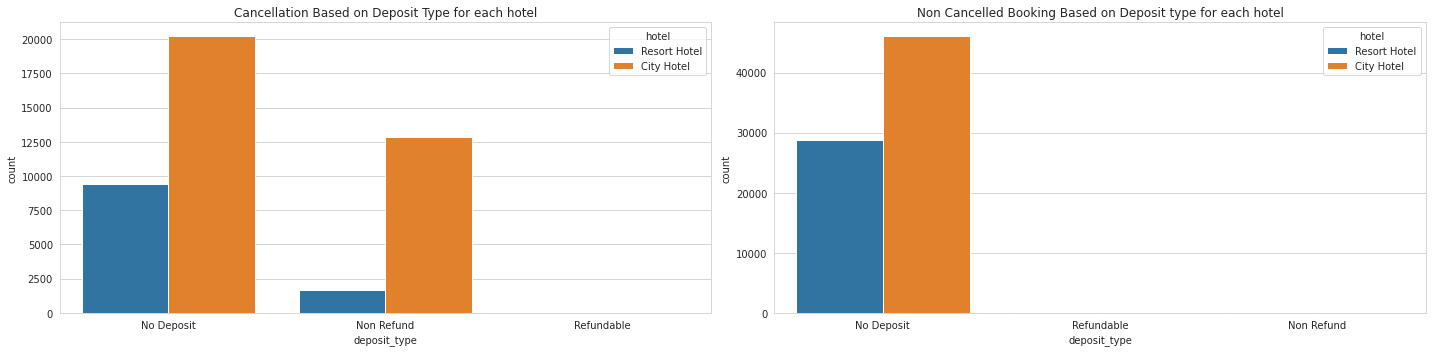

In [79]:
#cancellation and deposit type of each hotel
plt.figure(figsize = (20, 5))
plt.subplot(1,2,1)
sns.countplot(data = df_canceled, x = 'deposit_type', hue = 'hotel')
plt.title("Cancellation Based on Deposit Type for each hotel")
plt.subplot(1,2,2)
sns.countplot(data = df_not_canceled, x = 'deposit_type', hue = 'hotel')
plt.title("Non Cancelled Booking Based on Deposit type for each hotel")
plt.tight_layout()
plt.show()

# No Deposit policy has the highest amount of cancellation of rate of all deposit types policy in both hotel
# Non Refund policy comes second in the highest number of cancellation

#Majority of confirmed booking is on no deposit policy as well

# Suggestion:
    # Non Refund deposit policy should be pushout more since it wouldn't hurt hotel in term of reevenue when the traveler canceled


Text(0.5, 1.0, 'Market Segment of canceled and non canceled booking')

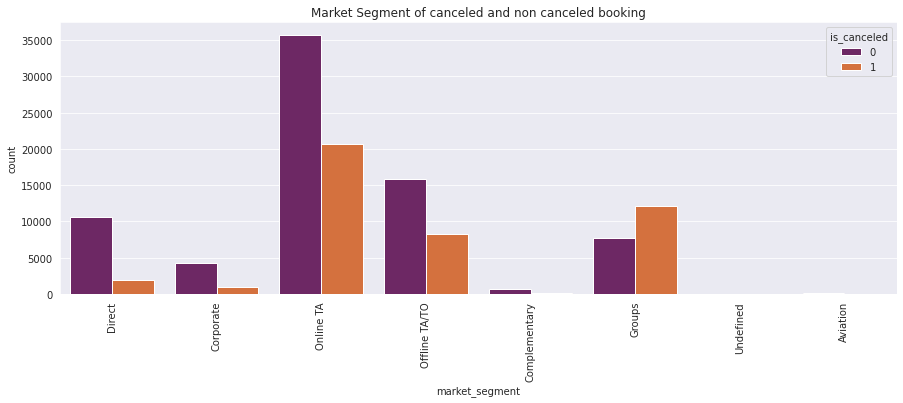

In [120]:
plt.figure(figsize = (15,5))
schart = sns.countplot(x= 'market_segment', hue = 'is_canceled', data = hotel, palette = 'inferno')
schart.set_xticklabels(
    schart.get_xticklabels(), 
    rotation=90)
plt.title('Market Segment of canceled and non canceled booking')
plt.show()
# Group Booking is the only market segment that has a higher cancellation rate compared to it's non canceled booking the other market segment

# Online Travel Agent 

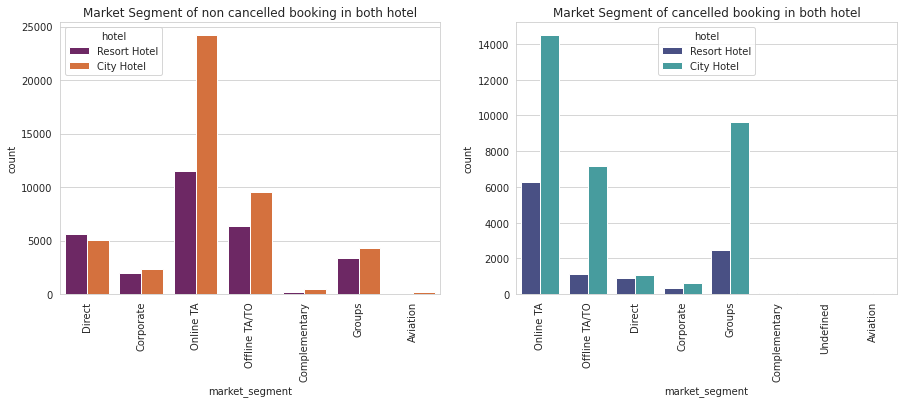

In [81]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
chart = sns.countplot(x= 'market_segment', hue = 'hotel', data = df_not_canceled, palette = 'inferno')
chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=90)
plt.title('Market Segment of non cancelled booking in both hotel')

plt.subplot(1,2,2)
chart1 = sns.countplot(x= 'market_segment', hue = 'hotel', data = df_canceled, palette = 'mako')
chart1.set_xticklabels(
    chart1.get_xticklabels(), 
    rotation=90)
plt.title('Market Segment of cancelled booking in both hotel')
plt.show()

# we see that most hotels booking was not canceled when guest book City Hotel through Online Travel Agent
# but in the other side, City Hotel booking through Online TA is the most cancelation booking too
# notice that Group segment is the second most cancelation hotel booking in City Hotel

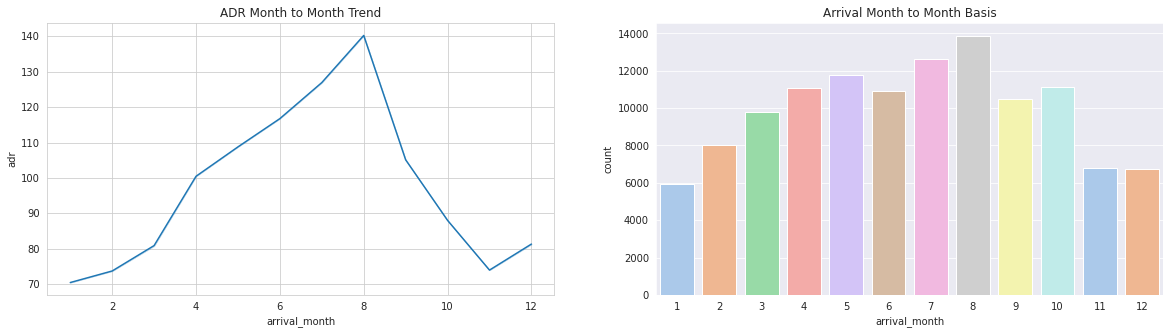

In [82]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.set_style('darkgrid')
sns.lineplot(x= 'arrival_month', y='adr', data = hotel, palette = 'Spectral', ci = 0)
plt.title('ADR Month to Month Trend')
plt.subplot(1,2,2)
sns.countplot(x = 'arrival_month', data = hotel, palette = 'pastel')
plt.title('Arrival Month to Month Basis')
plt.show()

# majority of market segment adr going up from january to august with few exception of aviation and groups
# From August to the end of the year majority adr trend are going down
# Number of Arrival seems to have a positive correlation with adr

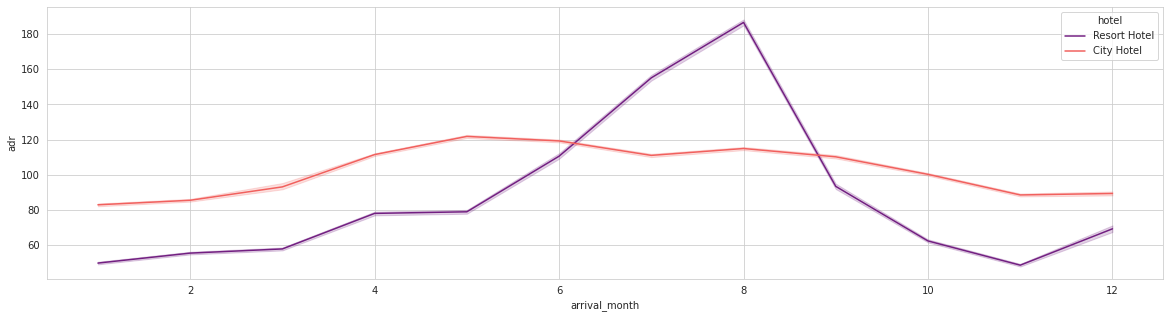

In [83]:
plt.figure(figsize = (20,5))
sns.set_style('whitegrid')
sns.lineplot(x= 'arrival_month', y='adr', hue = 'hotel', data = hotel, palette = 'magma')

## Resort hotel adr tend to be more fluctuative compared to city hotel, January seems to be the lowest adr for resort hotel

## for city hotel adr seems to be more stable it has it lowest adr on January

# for most of the year city hotel has a higher adr compared to resort hotel, with exception of july and august
# adr resort hotel showing positive trend from january to august after that the adr showing negative trend until november

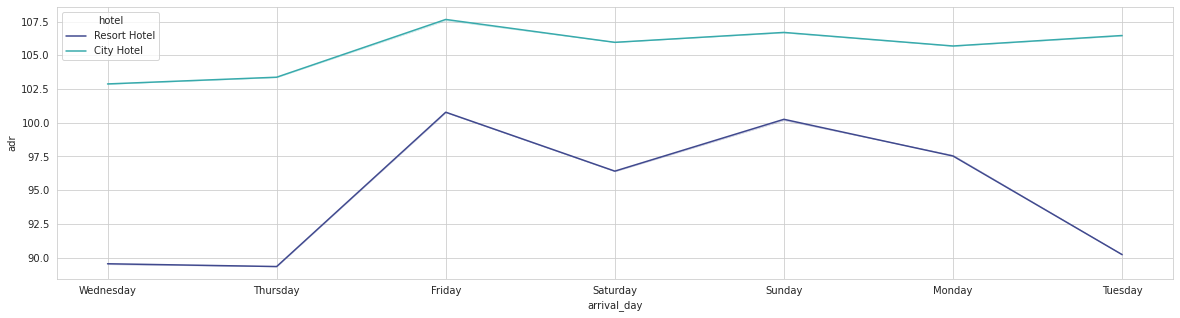

In [84]:
plt.figure(figsize = (20,5))
sns.set_style('whitegrid')
sns.lineplot(x= 'arrival_day', y='adr', hue = 'hotel', data = hotel, palette = 'mako', ci = 0)

# Booking on the arrival day of Friday seems to have the most expensive adr in both hotel
# While Arrival day on Wednesday seems to have the lowest adr on both hotel

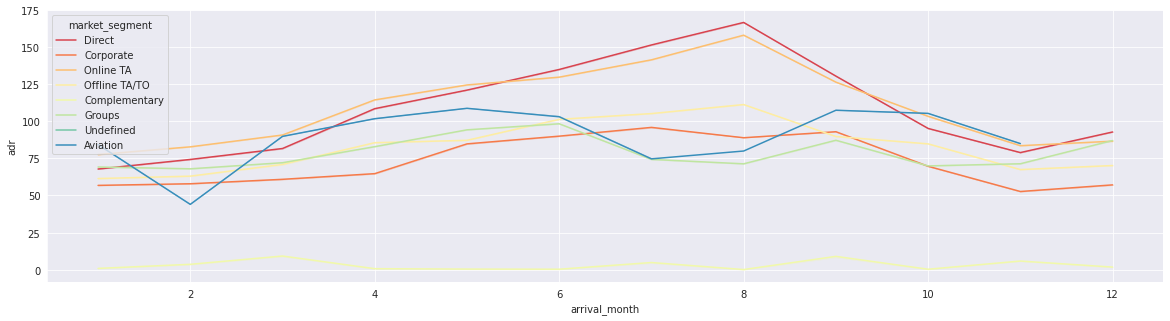

In [85]:
plt.figure(figsize = (20,5))
sns.set_style('darkgrid')
sns.lineplot(x= 'arrival_month', y='adr', data = hotel, hue = 'market_segment', palette = 'Spectral', ci = 0)

# Corporate seems to have the lowest adr for majority of the first six month of the year
# majority of market segment adr going up from january to august with few exception of aviation and groups
# From August to the end of the year majority adr trend are going down

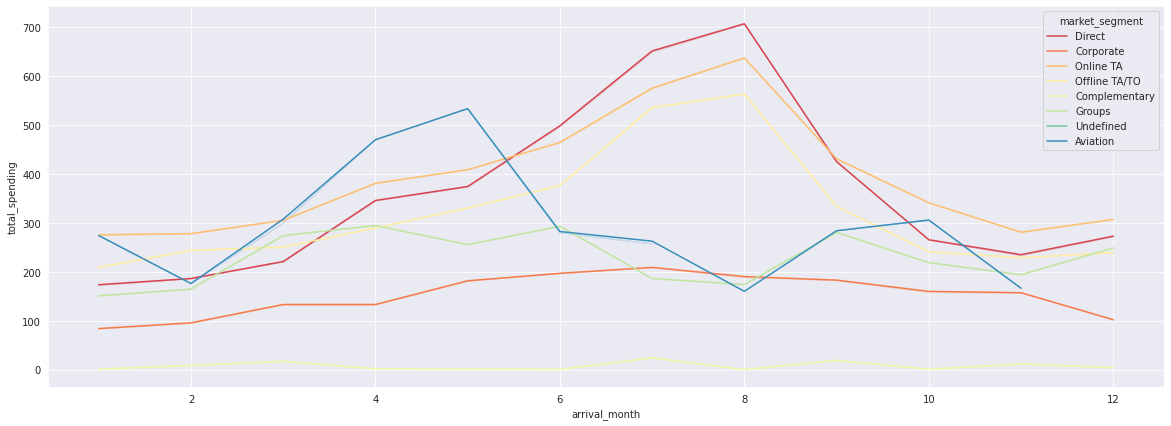

In [86]:
plt.figure(figsize = (20,7))
sns.set_style('darkgrid')
sns.lineplot(x = 'arrival_month', y = 'total_spending', hue = 'market_segment', data = hotel, palette = 'Spectral', ci = 0)
plt.show()

# ADR on 'Direct booking' is the greatest than the other market segment
# ADR on 'Corporate' is the smallest value than the other market segment

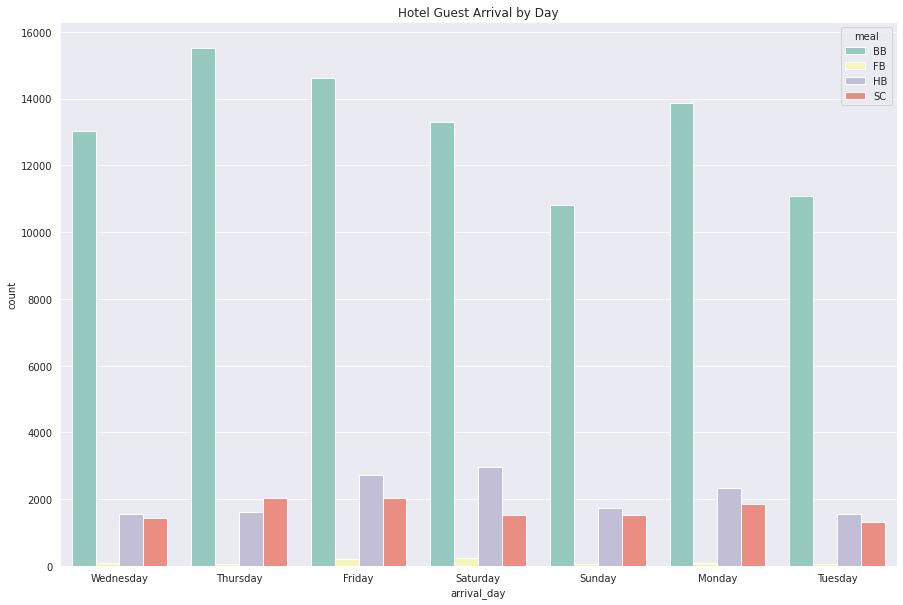

In [87]:
plt.figure(figsize = (15,10))
sns.countplot(data = hotel, x = 'arrival_day', hue = 'meal', palette = 'Set3')
plt.title("Hotel Guest Arrival by Day")
plt.show()

# we see that the most ordered meal in every day is Bed-Breakfast package.

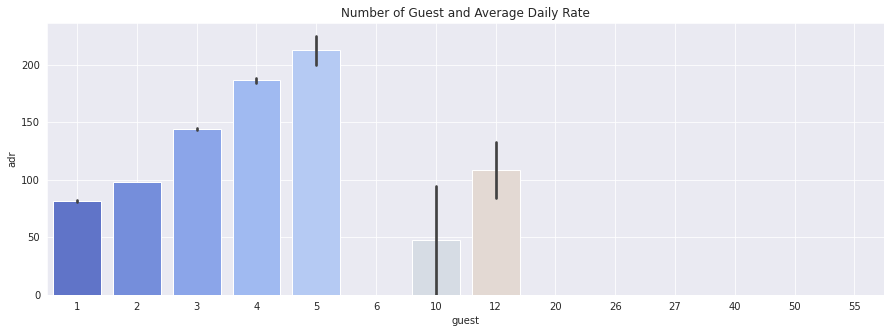

In [88]:
plt.figure(figsize=(15,5))
sns.barplot(x = 'guest', y = 'adr', data = hotel, palette = 'coolwarm')
plt.title("Number of Guest and Average Daily Rate")
plt.grid(True)
plt.show()

# We see that booking with 5 person guests results the highest 'adr' value

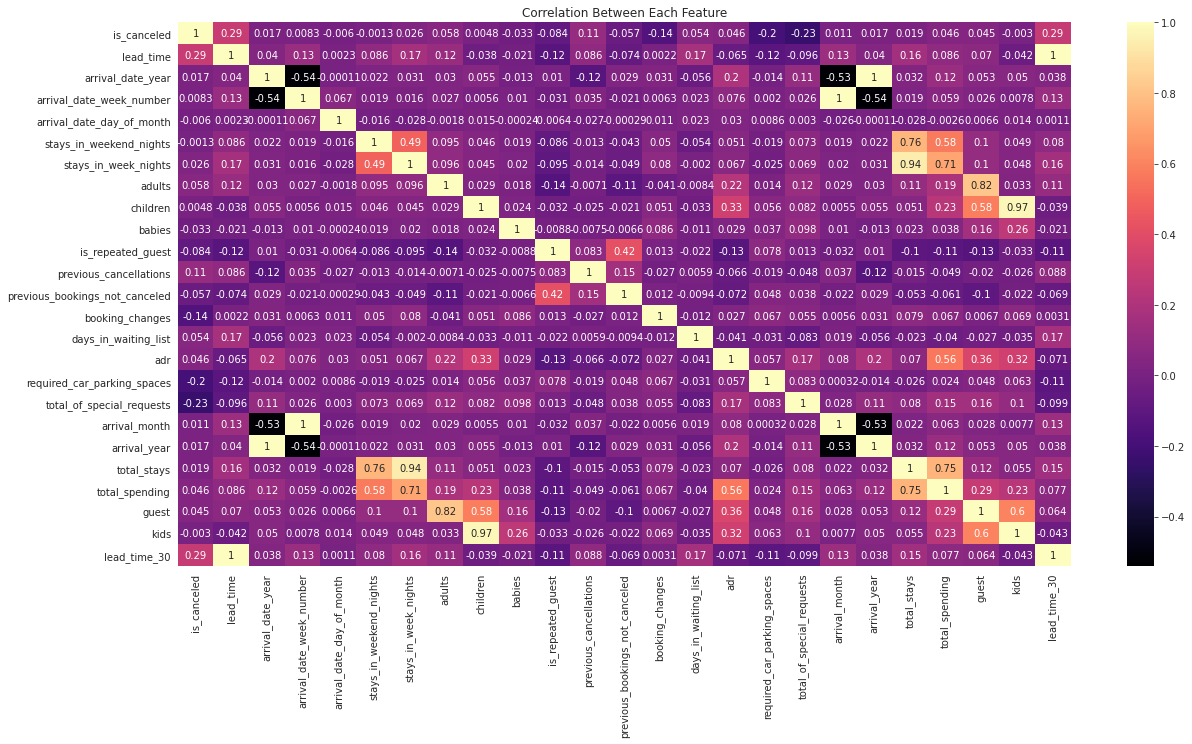

In [89]:
plt.figure(figsize=(20,10))
sns.heatmap(hotel.corr(), cmap = 'magma', annot = True)
plt.title("Correlation Between Each Feature")

plt.show()

# we see that there is strong correlation between 'total stays' and 'stays_in_week_nights' and 'stays_in_weekend_nights'. 
# This is make sense since that column are extracted from both columns
# Same with 'adr' and 'total spending'
# For example, correlation between 'is_canceled' with 'lead_time' is 0.29
# Eventhough this value is small, but we already saw that 'lead time' very affects 'is_canceled' based on previous visualizations

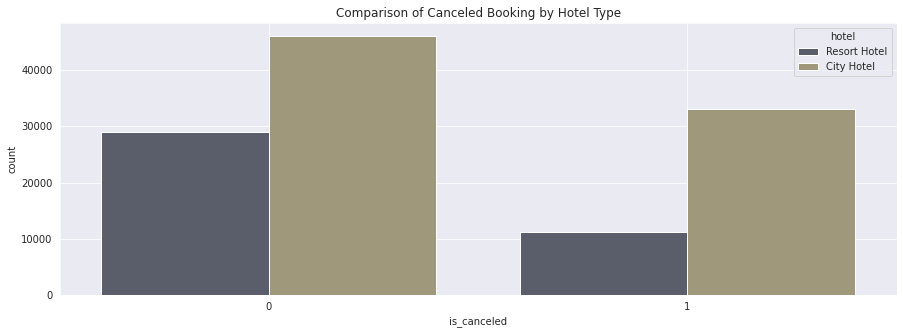

In [90]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'is_canceled', data = hotel, hue = 'hotel', palette = 'cividis')
plt.title("Comparison of Canceled Booking by Hotel Type")
plt.grid(True)
plt.show()

# we see that City Hotel still dominates Resort Hotel for the context of cancelelation booking

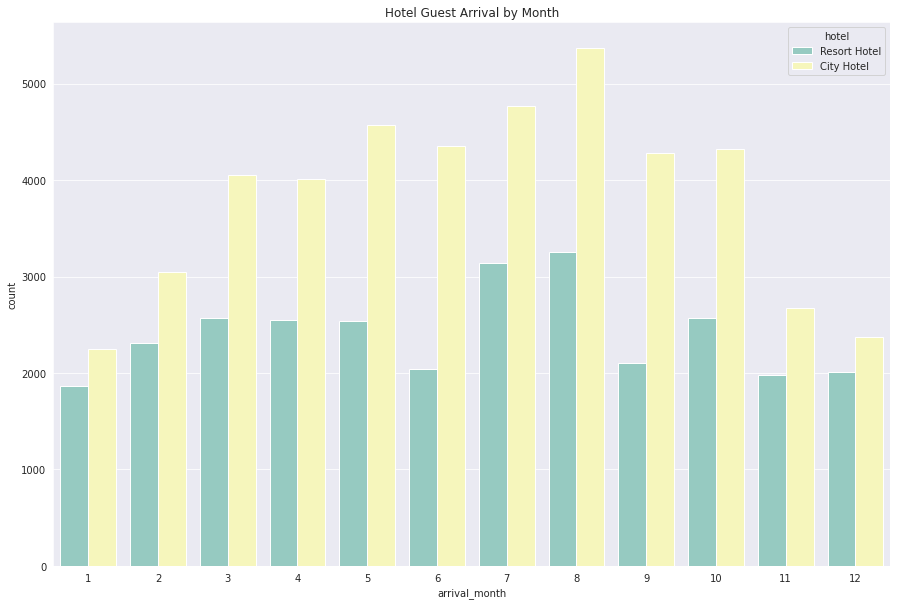

In [91]:
hotel_nc = hotel[hotel['is_canceled'] == 0]

plt.figure(figsize = (15,10))
sns.countplot(data = hotel_nc, x = 'arrival_month', hue = 'hotel',palette = 'Set3')
plt.title("Hotel Guest Arrival by Month")
plt.show()

# Whether Resort or City Hotel, Q2-Q3 has its peak. Take a look on July-August.
# Both Resort and City has same up-trend

# The interesting fact is, notice in November and December bar.
# The City Hotel is going down, while Resort Hotel is going up.
# We see that people tend to spend their holidays on the Hotel with sceneric view, eventhough by number the City Hotel is still the most booked.

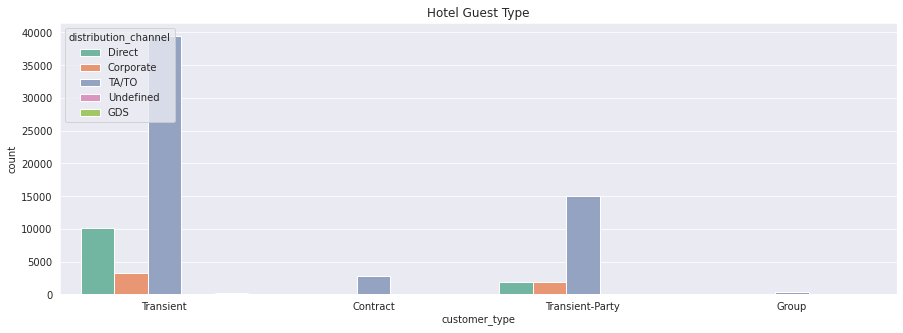

In [92]:
plt.figure(figsize = (15,5))
sns.countplot(data = hotel_nc, x = 'customer_type', hue = 'distribution_channel', palette = 'Set2')
plt.title("Hotel Guest Type")
plt.show()

# Contract - when the booking has an allotment or other type of contract associated to it; 
# Group – when the booking is associated to a group; 
# Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; 
# Transient-party – when the booking is transient, but is associated to at least other transient booking."

# we see that 'transient' is the most type that booked the hotel. We know now that most guests is not part of a group or a contract, and isn't associated to other transient booking

In [93]:
bymonth = hotel_nc.groupby('arrival_month').count()
bymonth
# creating new dataframe as grouping dataset by 'arrival_month' for further analysis purposes

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_day,arrival_year,month_year,booking_date,total_stays,total_spending,guest,kids,lead_time_30
arrival_month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115,4115
2,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359,5359
3,6619,6619,6619,6619,6619,6619,6619,6619,6619,6619,6619,6619,6619,6619,6619,6619,6619,6619,6619,6619,6619,6619,6619,6619,6619,6619,6619,6619,6619,6619,6619,6619,6619,6619,6619,6619,6619,6619,6619,6619
4,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560,6560
5,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103,7103
6,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395,6395
7,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907,7907
8,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624,8624
9,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385,6385


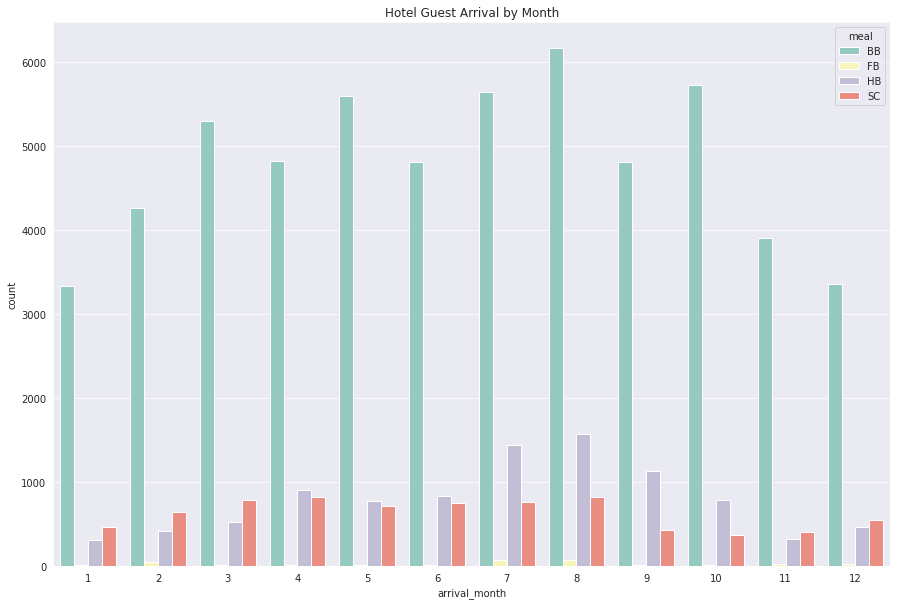

In [95]:
plt.figure(figsize = (15,10))
sns.countplot(data = hotel_nc, x = 'arrival_month', hue = 'meal',palette = 'Set3')
plt.title("Hotel Guest Arrival by Month")
plt.show()

# We see that guests tend to book the room with 'BB' package.
# While 'HB' and 'SC' is vary depends on the month
# Take a look on July-August, they have 'HB' more than 'SC'.
# But when we look on November-March, guests tend to 'SC' rather than 'HB'
# We understand when we approach holiday months or earlier year, guests tend to have a room but they have their own agenda to enjoy the city or hangout to other places.

In [ ]:
# hotel_nc.groupby('meal').mean()
hotel_nc.groupby(['meal', 'arrival_month']).mean()['guest'].unstack(level = -1)

arrival_month,1,2,3,4,5,6,7,8,9,10,11,12
meal,,,,,,,,,,,,
BB,1.740474,1.837166,1.842393,1.973695,1.894464,1.957128,2.232488,2.240188,1.888635,1.839853,1.695597,1.937071
FB,1.857143,1.934783,2.076923,2.000000,2.000000,2.285714,2.436620,2.661972,2.071429,1.800000,1.900000,1.958333
HB,1.961538,2.216019,1.961390,1.924528,1.945876,2.018051,2.138793,2.214149,1.899471,1.884518,1.960000,1.997863
SC,1.641469,1.873239,1.821519,1.887255,1.817294,1.888591,1.948413,2.031785,1.875000,1.809140,1.797500,1.858974


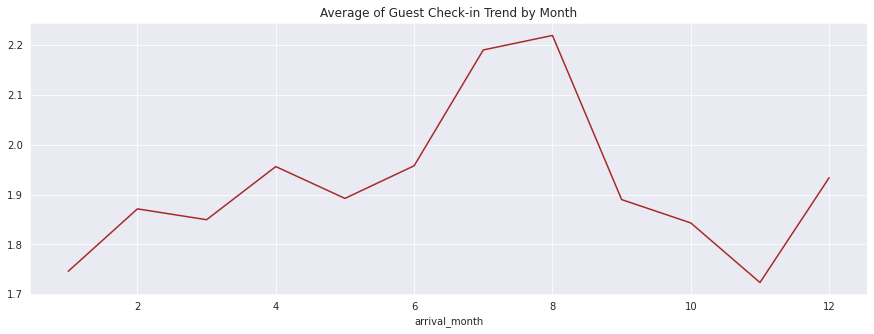

In [ ]:
plt.figure(figsize = (15,5))
hotel_nc.groupby('arrival_month').mean()['guest'].plot(color = 'brown')
plt.title("Average of Guest Check-in Trend by Month")
plt.grid(True)
plt.show()

# We see that the average number of guest to check-in about 1.5 until 2.2
# its peak is in July and August, where the average guest is 2 guests.

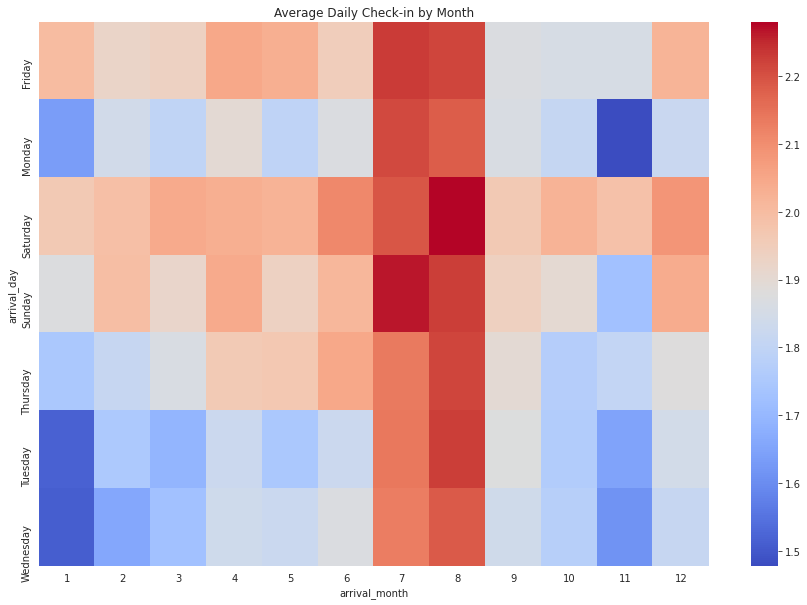

In [142]:
daymonth = hotel_nc.groupby(['arrival_day', 'arrival_month']).mean()['guest'].unstack(level = -1)

plt.figure(figsize = (15,10))
sns.heatmap(daymonth, cmap = 'coolwarm')
plt.title("Average Daily Check-in by Month")
plt.show()

# we see that most guests check-in on July and August, especially every Saturday and Sunday
# Hotel management could coordinates with restaurant team where we all can see guests tend to come based on the plot
# Especially, on Saturday and Sunday, the peak of guests come.
# Restaurant team could add more resources like food and workers for maximize and efficiency hotel services

<Figure size 1080x720 with 0 Axes>

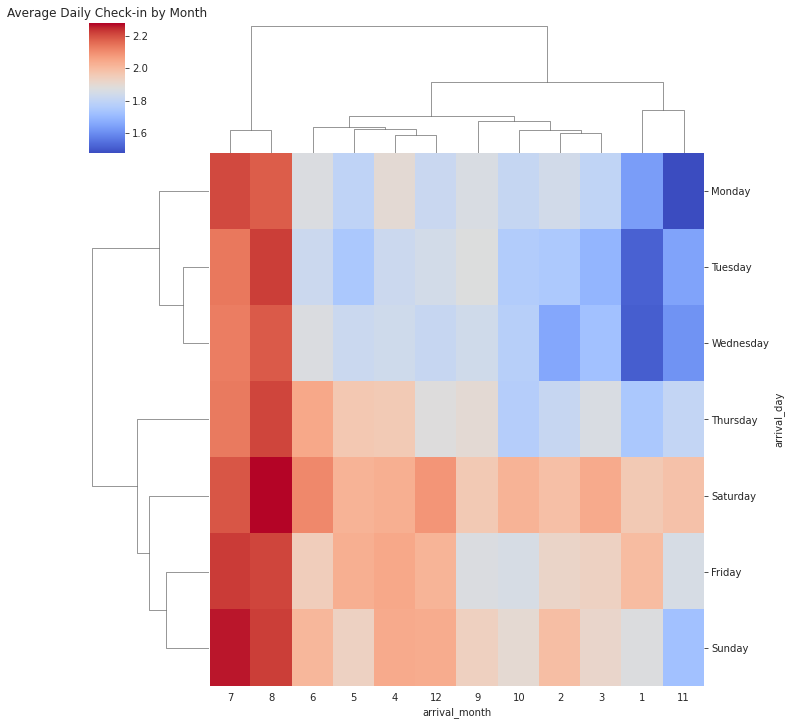

In [143]:
plt.figure(figsize = (15,10))
sns.clustermap(daymonth, cmap = 'coolwarm')
plt.title("Average Daily Check-in by Month")
plt.show()

# This is cluster heat maps, actually this plot is the same with the normal heatmap.
# It differs contrastly like we can see that November, and January has the lowest guests come rather than other months
# we can see that on those months especially Monday, Tuesday, and Wednesday are the lowest average guest check-in

# 8) Conclusion
- Number Booking have a positive correlation with the number of cancellation
- Group Booking is the only market segment that have a higher cancellation  arrival  compared to it’s confirmed arrival
- Customer who has 7 month or more lead time have a higher tendencies to cancel their booking
- Traveler that has cancelled 1 time before has the highest tendencies to cancel again
- Guests tend to book their rooms with breakfast instead of lunch or dinner.
- Most guests come and start to stay in June, July, and August.
- In Portugal, the busiest month in the hotels are July and August, especially on Saturday and Sunday when guests start to check-in.



# 9) Recommendations
- **More Rigid /Stricter  Cancellation T&C  For Customer Who has Cancelled Before.** This is  one way to  reducing the tendencies of customers who have cancelled before to cancelled again.
- **Non Refundable Only for Group Booking.** Group Booking has a higher cancellation rate compared to the confirmed rate,  with this policy hotel would not suffer  any loss revenue caused by cancelled group booking.
- **Non Refundable Booking Only For Booking with More than 210 lead days.** Since Customer who has more than 210  lead days has a higher chance of cancellation, having this policy will protect the hotel from losing revenue.
- **Breakfast Awareness.** Guests tend to have their bedrooms with breakfast package, so it might be good if management place more workers in the morning instead of noon or night. Even workers at the noon can be reduced and moved into the night shift. 
- **Resources Efficiency.** Resources are precious, especially when it comes to food and humans. July and August are the best time to stock more food especially on Saturday and Sunday where guests start to check-in the room. The restaurant team could increase the number of workers too, to handle guests when meal time has come. This is good for cost efficiency so the resources either humans or food might not be wasted.






